# 📊 Визуализация NLP анализа отзывов

Этот ноутбук визуализирует результаты анализа тональности и проблем из отзывов.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Настройка стиля
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Поддержка русского языка
plt.rcParams['font.family'] = 'DejaVu Sans'

print("✅ Базовые библиотеки загружены")
print("\n💡 Для полной функциональности установите дополнительные библиотеки:")
print("   pip install scipy scikit-learn mlxtend")


✅ Библиотеки загружены


In [17]:
# Загрузка данных
# Путь относительно корня проекта (ноутбук находится в docs/)
import os
import sys

# Добавляем корневую папку проекта в путь
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Загружаем исходные данные
df = pd.read_csv('../data/all_reviews.csv', encoding='utf-8-sig')

print(f"📊 Загружено {len(df)} отзывов")
print(f"📋 Колонки: {', '.join(df.columns)}")

# Запускаем NLP анализ
print("\n⏳ Запускаем NLP анализ отзывов...")
from nlp.review_analyzer import ReviewAnalyzer

analyzer = ReviewAnalyzer()

# Проверяем наличие колонки 'rating'
rating_col = 'rating' if 'rating' in df.columns else None

# Запускаем анализ (результаты хранятся только в памяти)
df_analyzed = analyzer.analyze_dataframe(df, text_column='text', rating_column=rating_col)

# Удаляем дублирующиеся колонки из df_analyzed (оставляем только результаты анализа)
columns_to_drop = ['text', 'rating']
if 'text' in df_analyzed.columns:
    df_analyzed = df_analyzed.drop(columns=['text'])
if 'rating' in df_analyzed.columns:
    df_analyzed = df_analyzed.drop(columns=['rating'])

# Объединяем результаты анализа с исходным DataFrame
df = df.reset_index()
df = df.merge(df_analyzed, left_on='index', right_on='original_index', how='left')

# Удаляем служебные колонки
df = df.drop(columns=['index', 'original_index'])

print(f"✅ NLP анализ завершен!")
print(f"📊 Всего проанализировано отзывов: {len(df)}")
print(f"📋 Новые колонки: {', '.join([col for col in df.columns if col not in ['id', 'text', 'rating', 'author', 'date', 'source']])}")

df.head()


📊 Загружено 2772 отзывов
📋 Колонки: id, text, rating, author, date, source

⏳ Запускаем NLP анализ отзывов...
✅ NLP анализ завершен!
📊 Всего проанализировано отзывов: 2772
📋 Новые колонки: sentiment, sentiment_score, sentiment_confidence, has_problems, problems_count, problems, problem_categories, rating_sentiment_mismatch


,id,text,rating,author,date,source,sentiment,sentiment_score,sentiment_confidence,has_problems,problems_count,problems,problem_categories,rating_sentiment_mismatch
0,twogis_000,"Вкусная еда, авторские коктейли, приятное обсл...",3,МарияМурзаева,2025-11-14,2GIS,positive,1.000,0.2,False,0,[],[],False
1,twogis_001,"Неплохо, ел Рамен и ребраС звкзд с неба не хва...",3,АндрейШавнев,2025-11-14,2GIS,negative,-1.000,0.1,False,0,[],[],False
2,twogis_002,Замечательная кухня и прекрасный персонал,3,ЭлинаХохрякова,2025-11-14,2GIS,positive,1.000,0.2,False,0,[],[],False
3,twogis_003,Очень вкусные коктейли,3,AlexeyMilechin,2025-11-14,2GIS,positive,1.000,0.1,False,0,[],[],False
4,twogis_004,Очень вкусная еда. Пробовали почти все закуски...,3,AleksandrNikolaev,2025-11-14,2GIS,negative,-0.171,0.7,False,0,[],[],False


## 📈 1. Распределение тональности


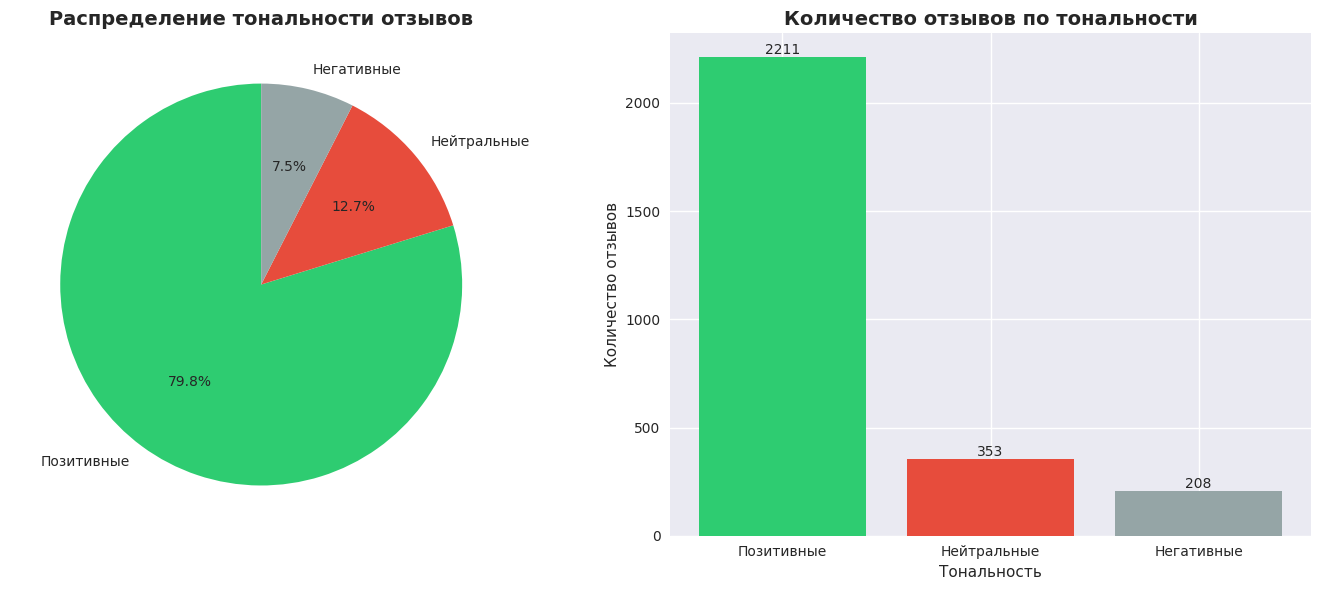


📊 Статистика:
  Позитивные: 2211 (79.8%)
  Нейтральные: 353 (12.7%)
  Негативные: 208 (7.5%)


In [18]:
# Подсчет тональности
sentiment_counts = df['sentiment'].value_counts()

# Перевод на русский
sentiment_labels = {
    'positive': 'Позитивные',
    'negative': 'Негативные',
    'neutral': 'Нейтральные'
}

sentiment_counts_ru = pd.Series({
    sentiment_labels.get(k, k): v 
    for k, v in sentiment_counts.items()
})

# Создание графика
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Круговая диаграмма
colors = ['#2ecc71', '#e74c3c', '#95a5a6']
ax1.pie(sentiment_counts_ru.values, 
        labels=sentiment_counts_ru.index, 
        autopct='%1.1f%%',
        colors=colors,
        startangle=90)
ax1.set_title('Распределение тональности отзывов', fontsize=14, fontweight='bold')

# Столбчатая диаграмма
bars = ax2.bar(sentiment_counts_ru.index, sentiment_counts_ru.values, color=colors)
ax2.set_title('Количество отзывов по тональности', fontsize=14, fontweight='bold')
ax2.set_ylabel('Количество отзывов')
ax2.set_xlabel('Тональность')

# Добавление значений на столбцы
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n📊 Статистика:")
for sentiment, count in sentiment_counts_ru.items():
    percent = count / len(df) * 100
    print(f"  {sentiment}: {count} ({percent:.1f}%)")


## 🔍 2. Анализ проблем и жалоб


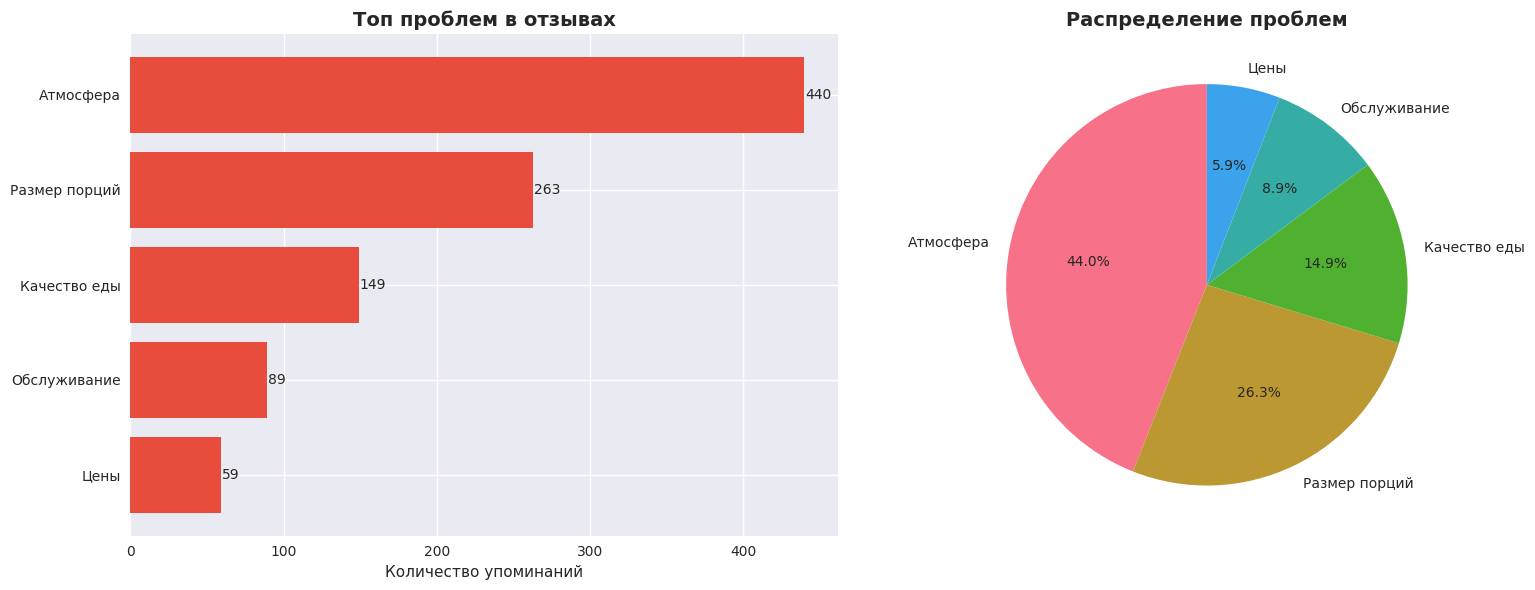


🔍 Всего проблем найдено: 1000
📝 Отзывов с проблемами: 793 (28.6%)

📊 Топ проблем:
  1. Атмосфера: 440
  2. Размер порций: 263
  3. Качество еды: 149
  4. Обслуживание: 89
  5. Цены: 59


In [ ]:
# Проверяем, что df определена
if 'df' not in globals():
    print("⚠️ Переменная df не определена. Загружаем данные...")
    # Загрузка данных
    import os
    import sys
    import pandas as pd
    
    # Добавляем корневую папку проекта в путь
    project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
    if project_root not in sys.path:
        sys.path.insert(0, project_root)
    
    # Загружаем исходные данные
    df = pd.read_csv('../data/all_reviews.csv', encoding='utf-8-sig')
    
    # Запускаем NLP анализ
    print("⏳ Запускаем NLP анализ отзывов...")
    from nlp.review_analyzer import ReviewAnalyzer
    
    analyzer = ReviewAnalyzer()
    rating_col = 'rating' if 'rating' in df.columns else None
    df_analyzed = analyzer.analyze_dataframe(df, text_column='text', rating_column=rating_col)
    
    # Удаляем дублирующиеся колонки из df_analyzed (оставляем только результаты анализа)
    if 'text' in df_analyzed.columns:
        df_analyzed = df_analyzed.drop(columns=['text'])
    if 'rating' in df_analyzed.columns:
        df_analyzed = df_analyzed.drop(columns=['rating'])
    
    # Объединяем результаты
    df = df.reset_index()
    df = df.merge(df_analyzed, left_on='index', right_on='original_index', how='left')
    df = df.drop(columns=['index', 'original_index'])
    print("✅ Данные загружены и проанализированы!")

# Проверяем наличие необходимых колонок
if 'problem_categories' not in df.columns or 'has_problems' not in df.columns:
    print("⚠️ Колонки анализа не найдены. Убедитесь, что ячейка 2 была выполнена успешно.")
    raise KeyError("Необходимые колонки отсутствуют. Выполните ячейку 2 для загрузки и анализа данных.")

# Подсчет проблем по категориям
all_categories = []
for categories in df['problem_categories']:
    # Безопасная проверка наличия данных (избегаем проблемы с массивами)
    try:
        # Сначала проверяем тип данных
        if categories is None:
            continue
        
        # Для списков и кортежей
        if isinstance(categories, (list, tuple)):
            if len(categories) > 0:
                all_categories.extend([c for c in categories if c])
            continue
        
        # Для строк
        if isinstance(categories, str):
            if len(categories.strip()) > 0:
                cats = [c.strip() for c in categories.split(',') if c.strip()]
                all_categories.extend(cats)
            continue
        
        # Для других типов (включая numpy arrays) - проверяем через try/except
        try:
            # Пробуем проверить через pd.isna (работает для скалярных значений)
            if not pd.isna(categories):
                # Если это что-то с длиной, проверяем длину
                if hasattr(categories, '__len__'):
                    if len(categories) > 0:
                        # Пробуем преобразовать в список
                        if hasattr(categories, 'tolist'):
                            all_categories.extend([c for c in categories.tolist() if c])
                        else:
                            all_categories.extend([c for c in list(categories) if c])
        except (ValueError, TypeError):
            # Если не получается проверить, пропускаем
            continue
    except Exception:
        # Пропускаем любые проблемные значения
        continue

category_counts = Counter(all_categories)

# Перевод категорий на русский
category_translation = {
    'качество_еды': 'Качество еды',
    'обслуживание': 'Обслуживание',
    'чистота': 'Чистота',
    'цены': 'Цены',
    'ожидание': 'Ожидание',
    'атмосфера': 'Атмосфера',
    'технические': 'Технические',
    'размер_порций': 'Размер порций'
}

category_counts_ru = {category_translation.get(k, k): v for k, v in category_counts.items()}

if category_counts_ru:
    # Создание графика
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Топ проблем (горизонтальная диаграмма)
    top_categories = dict(sorted(category_counts_ru.items(), key=lambda x: x[1], reverse=True)[:10])
    
    y_pos = np.arange(len(top_categories))
    bars = ax1.barh(y_pos, list(top_categories.values()), color='#e74c3c')
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(list(top_categories.keys()))
    ax1.set_xlabel('Количество упоминаний')
    ax1.set_title('Топ проблем в отзывах', fontsize=14, fontweight='bold')
    ax1.invert_yaxis()
    
    # Добавление значений
    for i, (category, count) in enumerate(top_categories.items()):
        ax1.text(count + 0.5, i, str(count), va='center')
    
    # Круговая диаграмма
    if len(top_categories) > 0:
        ax2.pie(top_categories.values(), 
                labels=top_categories.keys(), 
                autopct='%1.1f%%',
                startangle=90)
        ax2.set_title('Распределение проблем', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n🔍 Всего проблем найдено: {sum(category_counts_ru.values())}")
    print(f"📝 Отзывов с проблемами: {df['has_problems'].sum()} ({df['has_problems'].sum()/len(df)*100:.1f}%)")
    print(f"\n📊 Топ проблем:")
    for i, (cat, count) in enumerate(sorted(category_counts_ru.items(), key=lambda x: x[1], reverse=True)[:10], 1):
        print(f"  {i}. {cat}: {count}")
else:
    print("⚠️ Проблемы не найдены")


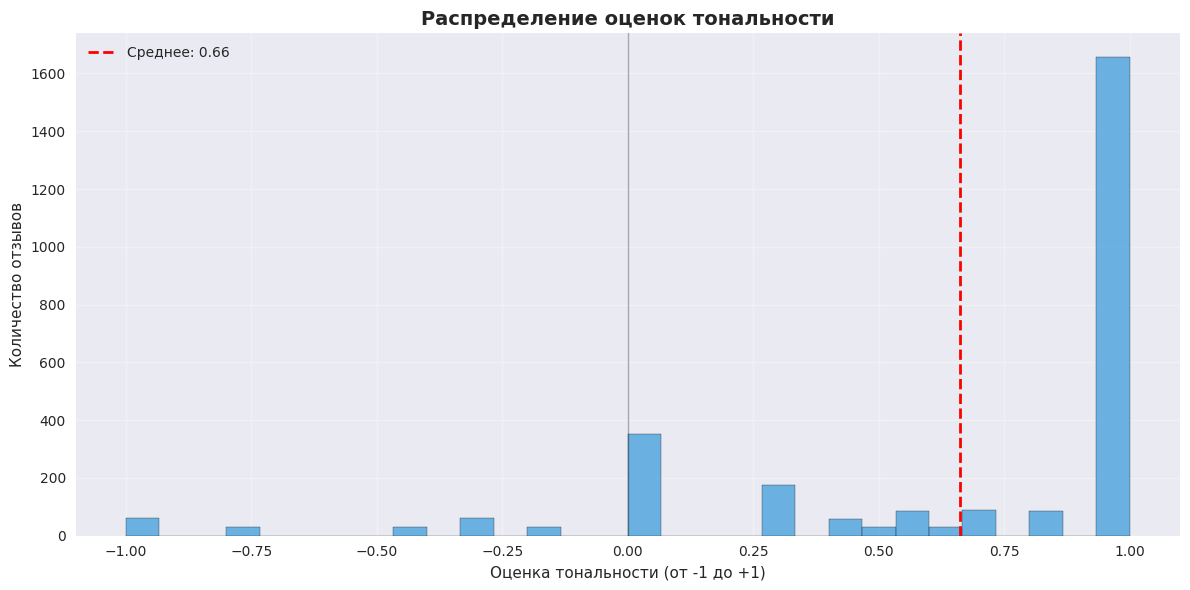


📈 Статистика оценок:
  Среднее: 0.662
  Медиана: 1.000
  Мин: -1.000
  Макс: 1.000


In [ ]:
# Гистограмма оценок тональности
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(df['sentiment_score'], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
ax.axvline(df['sentiment_score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {df["sentiment_score"].mean():.2f}')
ax.axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.3)

ax.set_title('Распределение оценок тональности', fontsize=14, fontweight='bold')
ax.set_xlabel('Оценка тональности (от -1 до +1)')
ax.set_ylabel('Количество отзывов')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📈 Статистика оценок:")
print(f"  Среднее: {df['sentiment_score'].mean():.3f}")
print(f"  Медиана: {df['sentiment_score'].median():.3f}")
print(f"  Мин: {df['sentiment_score'].min():.3f}")
print(f"  Макс: {df['sentiment_score'].max():.3f}")


## 🔗 4. Связь тональности и проблем


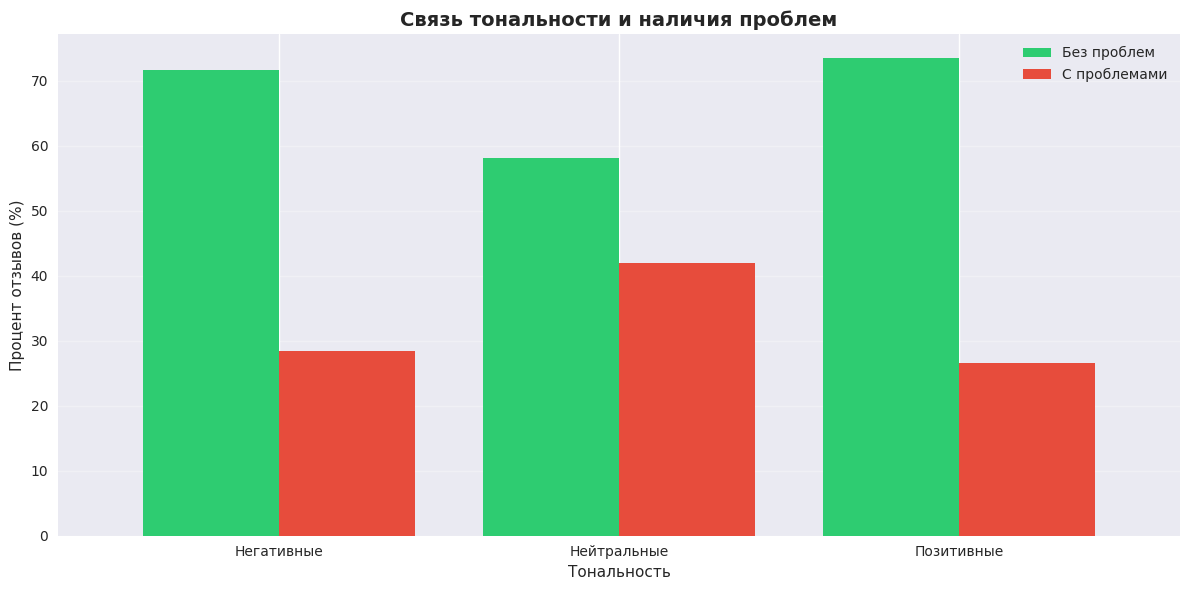


📊 Процент отзывов с проблемами по тональности:
  Негативные: 28.4%
  Нейтральные: 41.9%
  Позитивные: 26.5%


In [ ]:
# Проверяем наличие необходимых колонок
if 'sentiment' not in df.columns or 'has_problems' not in df.columns:
    print("⚠️ Колонки анализа не найдены. Убедитесь, что ячейка 2 была выполнена успешно.")
    raise KeyError("Необходимые колонки отсутствуют. Выполните ячейку 2 для загрузки и анализа данных.")

# Связь между тональностью и наличием проблем
fig, ax = plt.subplots(figsize=(12, 6))

# Создание сводной таблицы
pivot_data = pd.crosstab(df['sentiment'], df['has_problems'], normalize='index') * 100

# Перевод на русский
pivot_data.index = [sentiment_labels.get(idx, idx) for idx in pivot_data.index]
pivot_data.columns = ['Без проблем', 'С проблемами']

# Создание графика
pivot_data.plot(kind='bar', ax=ax, color=['#2ecc71', '#e74c3c'], width=0.8)
ax.set_title('Связь тональности и наличия проблем', fontsize=14, fontweight='bold')
ax.set_xlabel('Тональность')
ax.set_ylabel('Процент отзывов (%)')
ax.legend(title='')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📊 Процент отзывов с проблемами по тональности:")
for sentiment in pivot_data.index:
    with_problems = pivot_data.loc[sentiment, 'С проблемами']
    print(f"  {sentiment}: {with_problems:.1f}%")


## ⭐ 5. Анализ по рейтингам (если есть)


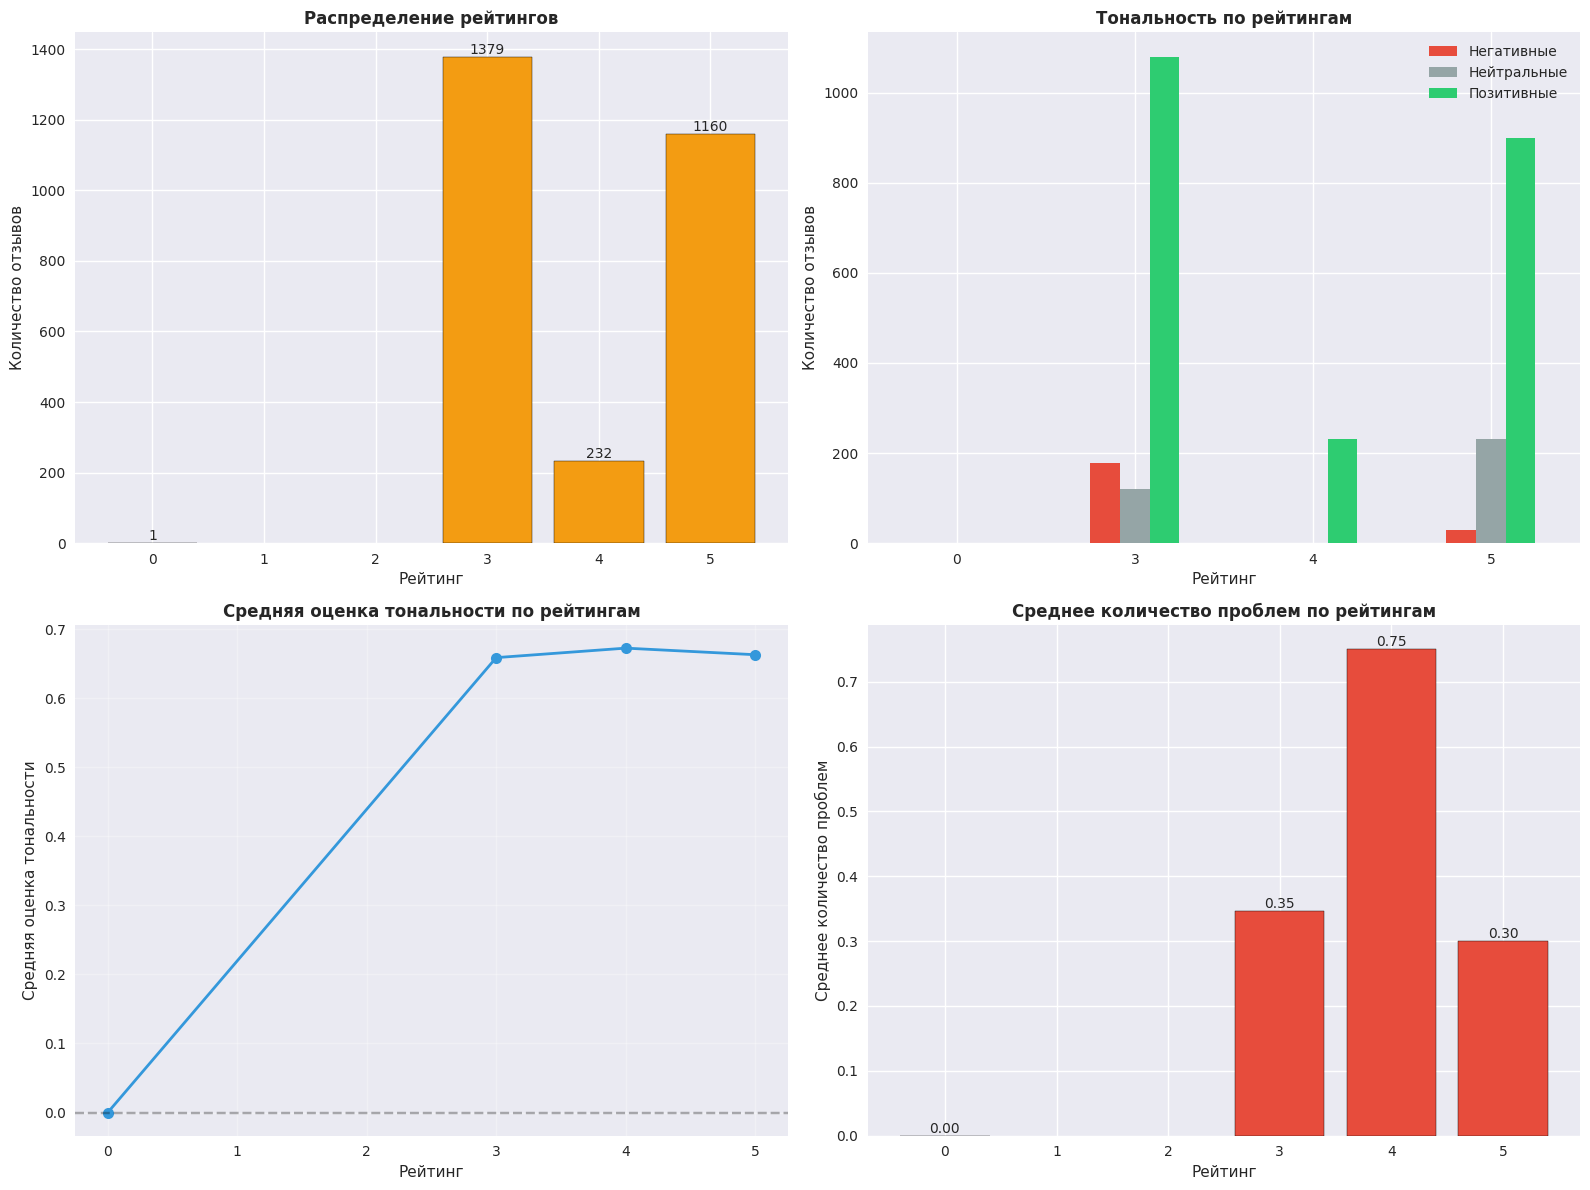


📊 Статистика по рейтингам:
        sentiment_score  problems_count  text
rating                                       
0                 0.000           0.000     1
3                 0.659           0.347  1379
4                 0.673           0.750   232
5                 0.663           0.300  1160


In [ ]:
# Анализ по рейтингам, если колонка есть
if 'rating' in df.columns and df['rating'].notna().any():
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Распределение рейтингов
    rating_counts = df['rating'].value_counts().sort_index()
    bars1 = ax1.bar(rating_counts.index, rating_counts.values, color='#f39c12', edgecolor='black')
    ax1.set_title('Распределение рейтингов', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Рейтинг')
    ax1.set_ylabel('Количество отзывов')
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}', ha='center', va='bottom')
    
    # Тональность по рейтингам
    rating_sentiment = pd.crosstab(df['rating'], df['sentiment'])
    rating_sentiment.plot(kind='bar', ax=ax2, color=['#e74c3c', '#95a5a6', '#2ecc71'])
    ax2.set_title('Тональность по рейтингам', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Рейтинг')
    ax2.set_ylabel('Количество отзывов')
    ax2.legend(['Негативные', 'Нейтральные', 'Позитивные'])
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
    
    # Средняя оценка тональности по рейтингам
    avg_sentiment_by_rating = df.groupby('rating')['sentiment_score'].mean()
    ax3.plot(avg_sentiment_by_rating.index, avg_sentiment_by_rating.values, 
             marker='o', linewidth=2, markersize=8, color='#3498db')
    ax3.set_title('Средняя оценка тональности по рейтингам', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Рейтинг')
    ax3.set_ylabel('Средняя оценка тональности')
    ax3.grid(True, alpha=0.3)
    ax3.axhline(0, color='black', linestyle='--', alpha=0.3)
    
    # Проблемы по рейтингам
    problems_by_rating = df.groupby('rating')['problems_count'].mean()
    bars4 = ax4.bar(problems_by_rating.index, problems_by_rating.values, color='#e74c3c', edgecolor='black')
    ax4.set_title('Среднее количество проблем по рейтингам', fontsize=12, fontweight='bold')
    ax4.set_xlabel('Рейтинг')
    ax4.set_ylabel('Среднее количество проблем')
    for bar in bars4:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Статистика по рейтингам:")
    print(df.groupby('rating').agg({
        'sentiment_score': 'mean',
        'problems_count': 'mean',
        'text': 'count'
    }).round(3))
else:
    print("⚠️ Колонка 'rating' не найдена или пуста")


## 🔗 6. Корреляционный анализ


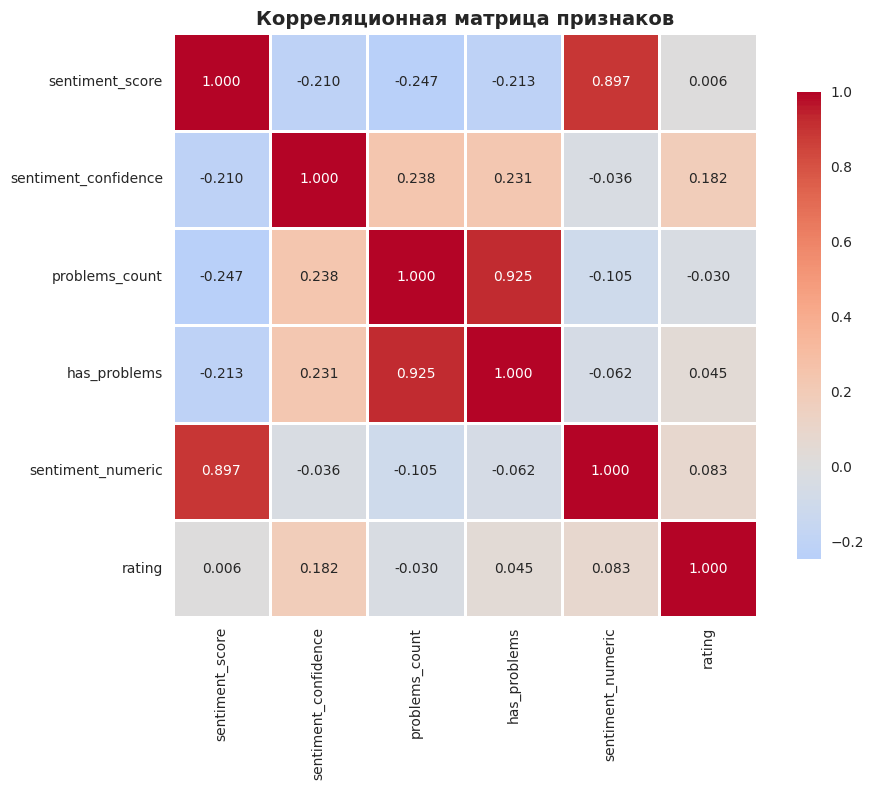


📊 Детальный анализ корреляций:

🔗 Корреляция тональности и проблем: -0.247
   Статистическая значимость: значима (p-value: 0.0000)

📊 Сильные корреляции (|r| > 0.3):
  sentiment_score ↔ sentiment_numeric: 0.897
  problems_count ↔ has_problems: 0.925


In [48]:
# Корреляционный анализ между признаками
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

# Подготовка данных для корреляционного анализа
corr_data = df.copy()

# Преобразуем категориальные признаки в числовые
if 'sentiment' in corr_data.columns:
    sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
    corr_data['sentiment_numeric'] = corr_data['sentiment'].map(sentiment_map)

# Выбираем числовые колонки для корреляции
numeric_cols = ['sentiment_score', 'sentiment_confidence', 'problems_count', 'has_problems']
if 'sentiment_numeric' in corr_data.columns:
    numeric_cols.append('sentiment_numeric')
if 'rating' in corr_data.columns:
    numeric_cols.append('rating')

# Создаем матрицу корреляций
corr_matrix = corr_data[numeric_cols].corr()

# Визуализация корреляционной матрицы
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Корреляционная матрица признаков', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Детальный анализ корреляций
print("\n📊 Детальный анализ корреляций:")
print("=" * 80)

# Корреляция тональности и проблем
if 'sentiment_score' in corr_data.columns and 'problems_count' in corr_data.columns:
    corr = corr_data['sentiment_score'].corr(corr_data['problems_count'])
    print(f"\n🔗 Корреляция тональности и проблем: {corr:.3f}")
    
    # Статистическая значимость
    r, p_value = pearsonr(corr_data['sentiment_score'].dropna(), 
                          corr_data['problems_count'].dropna())
    significance = "значима" if p_value < 0.05 else "не значима"
    print(f"   Статистическая значимость: {significance} (p-value: {p_value:.4f})")

# Сильные корреляции
print("\n📊 Сильные корреляции (|r| > 0.3):")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:
            print(f"  {corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}: {corr_val:.3f}")


## 🎯 7. Классификация отзывов


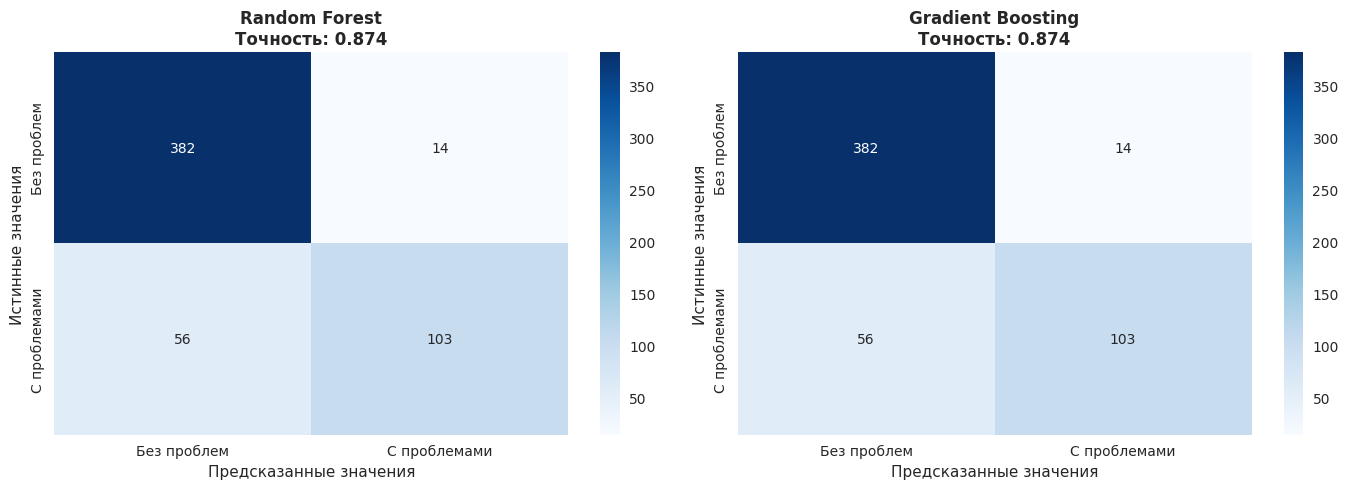


📊 Отчет по классификации (Random Forest):
              precision    recall  f1-score   support

 Без проблем       0.87      0.96      0.92       396
С проблемами       0.88      0.65      0.75       159

    accuracy                           0.87       555
   macro avg       0.88      0.81      0.83       555
weighted avg       0.87      0.87      0.87       555


📈 Важность признаков:
  sentiment_score: 0.498
  sentiment_confidence: 0.328
  rating: 0.173


In [49]:
# Классификация отзывов по тональности и проблемам
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Подготовка данных для классификации
X = df[['sentiment_score', 'sentiment_confidence']].copy()
if 'rating' in df.columns:
    X['rating'] = df['rating'].fillna(df['rating'].median())
X = X.fillna(X.mean())

y = df['has_problems'].astype(int)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение моделей
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=5)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {'model': model, 'accuracy': accuracy, 'predictions': y_pred}

# Визуализация результатов
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Без проблем', 'С проблемами'],
                yticklabels=['Без проблем', 'С проблемами'])
    axes[idx].set_title(f'{name}\nТочность: {result["accuracy"]:.3f}', fontweight='bold')
    axes[idx].set_ylabel('Истинные значения')
    axes[idx].set_xlabel('Предсказанные значения')

plt.tight_layout()
plt.show()

# Детальный отчет
print("\n📊 Отчет по классификации (Random Forest):")
y_pred_rf = results['Random Forest']['predictions']
target_names = ['Без проблем', 'С проблемами']
print(classification_report(y_test, y_pred_rf, target_names=target_names))

# Важность признаков
if hasattr(results['Random Forest']['model'], 'feature_importances_'):
    feature_importance = pd.Series(
        results['Random Forest']['model'].feature_importances_,
        index=X.columns
    ).sort_values(ascending=False)
    
    print("\n📈 Важность признаков:")
    for feature, importance in feature_importance.items():
        print(f"  {feature}: {importance:.3f}")


## 🎨 8. Кластеризация отзывов


🎯 Оптимальное число кластеров: 10 (silhouette score: 0.623)


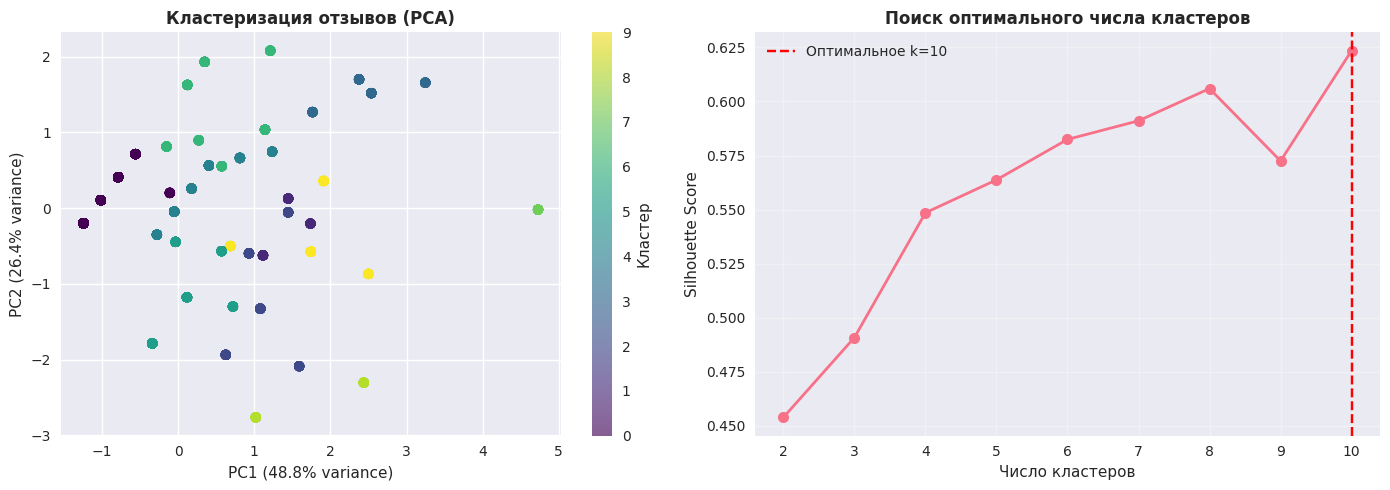


📊 Характеристики кластеров:
         Средняя тональность  Средняя уверенность  Среднее кол-во проблем  \
cluster                                                                     
0                      0.991                0.219                   0.000   
1                     -0.292                0.633                   0.000   
2                      0.102                0.201                   1.169   
3                      0.482                0.950                   1.250   
4                      0.940                0.336                   1.000   
5                     -0.001                0.177                   0.000   
6                      0.642                0.724                   0.000   
7                     -0.764                1.000                   2.000   
8                     -1.000                0.200                   0.500   
9                      0.545                0.324                   2.000   

         Доля с проблемами  
cluster          

In [52]:
# Кластеризация отзывов для выявления групп похожих отзывов
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Подготовка данных
X_cluster = df[['sentiment_score', 'sentiment_confidence', 'problems_count']].copy()
X_cluster = X_cluster.fillna(X_cluster.mean())

# Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Поиск оптимального числа кластеров
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Оптимальное число кластеров
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"🎯 Оптимальное число кластеров: {optimal_k} (silhouette score: {max(silhouette_scores):.3f})")

# Кластеризация с оптимальным числом кластеров
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Визуализация кластеров (PCA для 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Кластеры в пространстве PCA
scatter = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], 
                         cmap='viridis', alpha=0.6, s=50)
axes[0].set_title('Кластеризация отзывов (PCA)', fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.colorbar(scatter, ax=axes[0], label='Кластер')

# Silhouette scores
axes[1].plot(K_range, silhouette_scores, marker='o', linewidth=2, markersize=8)
axes[1].axvline(optimal_k, color='r', linestyle='--', label=f'Оптимальное k={optimal_k}')
axes[1].set_title('Поиск оптимального числа кластеров', fontweight='bold')
axes[1].set_xlabel('Число кластеров')
axes[1].set_ylabel('Silhouette Score')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Характеристики кластеров
print("\n📊 Характеристики кластеров:")
cluster_stats = df.groupby('cluster').agg({
    'sentiment_score': 'mean',
    'sentiment_confidence': 'mean',
    'problems_count': 'mean',
    'has_problems': 'mean'
}).round(3)
cluster_stats.columns = ['Средняя тональность', 'Средняя уверенность', 
                         'Среднее кол-во проблем', 'Доля с проблемами']
print(cluster_stats)


## 🚀 9. Ансамблевое обучение (Бэггинг и Бустинг)


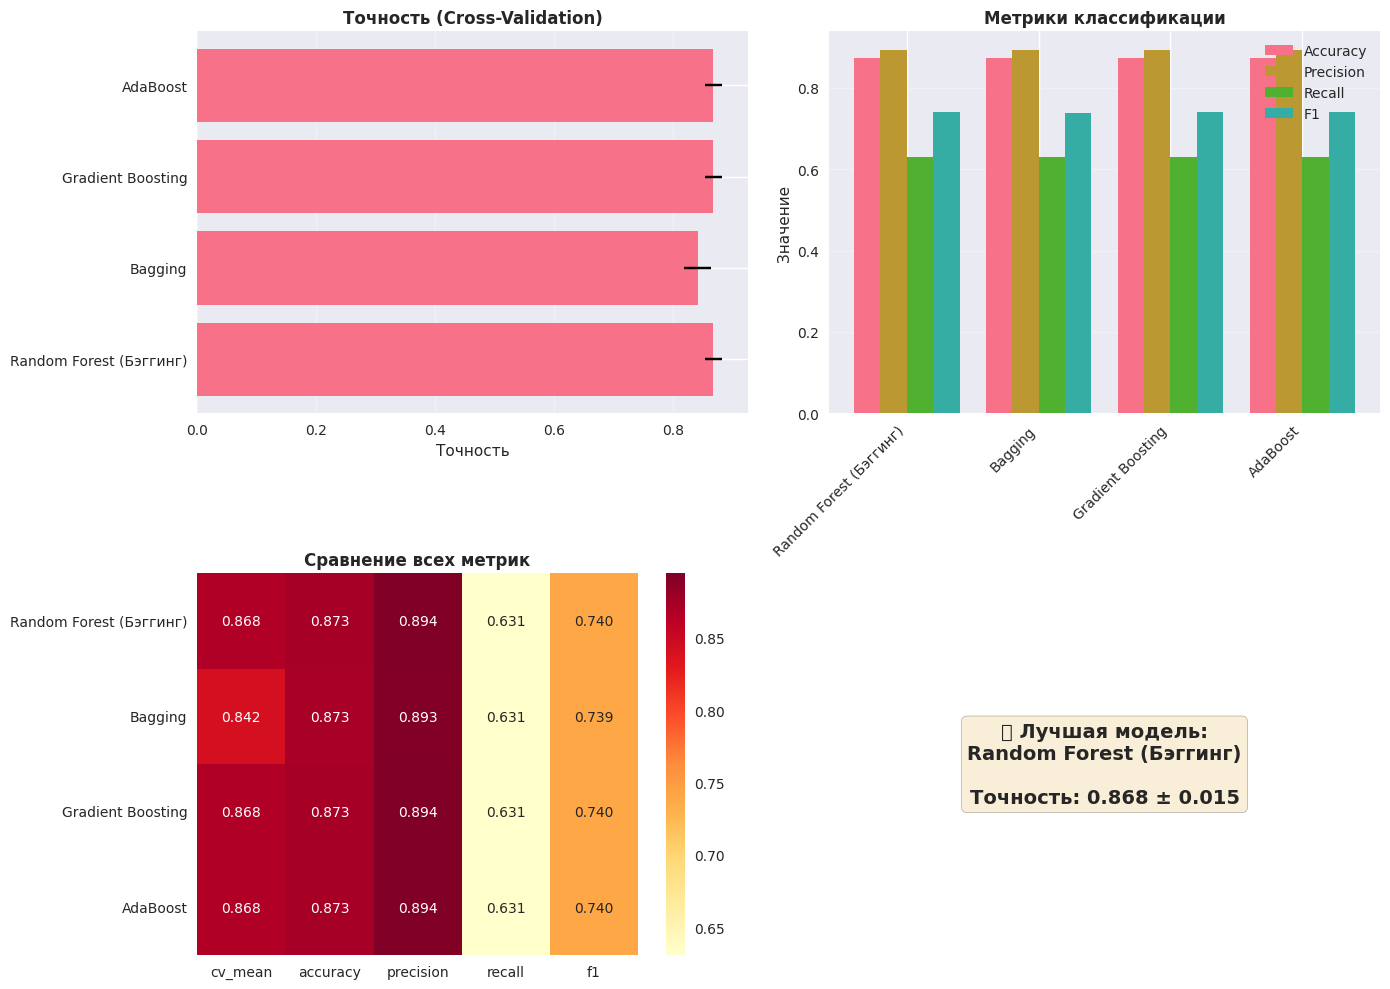


📊 Сравнение ансамблевых методов:

Random Forest (Бэггинг):
  • CV Точность: 0.868 ± 0.015
  • Precision: 0.894
  • Recall: 0.631
  • F1-Score: 0.740

Bagging:
  • CV Точность: 0.842 ± 0.023
  • Precision: 0.893
  • Recall: 0.631
  • F1-Score: 0.739

Gradient Boosting:
  • CV Точность: 0.868 ± 0.015
  • Precision: 0.894
  • Recall: 0.631
  • F1-Score: 0.740

AdaBoost:
  • CV Точность: 0.868 ± 0.015
  • Precision: 0.894
  • Recall: 0.631
  • F1-Score: 0.740


In [54]:
# Сравнение ансамблевых методов: Бэггинг и Бустинг
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                             AdaBoostClassifier, BaggingClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Подготовка данных
X = df[['sentiment_score', 'sentiment_confidence']].copy()
if 'rating' in df.columns:
    X['rating'] = df['rating'].fillna(df['rating'].median())
X = X.fillna(X.mean())

y = df['has_problems'].astype(int)

# Базовый классификатор для бэггинга
base_estimator = DecisionTreeClassifier(max_depth=5, random_state=42)

# Ансамблевые модели
ensemble_models = {
    'Random Forest (Бэггинг)': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10),
    'Bagging': BaggingClassifier(estimator=base_estimator, n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=5, learning_rate=0.1),
    'AdaBoost': AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
}

# Оценка моделей
results_ensemble = {}
for name, model in ensemble_models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    
    # Обучение на всех данных для финальной оценки
    model.fit(X, y)
    y_pred = model.predict(X)
    
    results_ensemble[name] = {
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'accuracy': accuracy_score(y, y_pred),
        'precision': precision_score(y, y_pred),
        'recall': recall_score(y, y_pred),
        'f1': f1_score(y, y_pred)
    }

# Визуализация результатов
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Точность (CV)
names = list(results_ensemble.keys())
cv_means = [results_ensemble[n]['cv_mean'] for n in names]
cv_stds = [results_ensemble[n]['cv_std'] for n in names]

axes[0, 0].barh(names, cv_means, xerr=cv_stds, capsize=5)
axes[0, 0].set_title('Точность (Cross-Validation)', fontweight='bold')
axes[0, 0].set_xlabel('Точность')
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Метрики
metrics = ['accuracy', 'precision', 'recall', 'f1']
x = np.arange(len(names))
width = 0.2

for i, metric in enumerate(metrics):
    values = [results_ensemble[n][metric] for n in names]
    axes[0, 1].bar(x + i*width, values, width, label=metric.capitalize())

axes[0, 1].set_title('Метрики классификации', fontweight='bold')
axes[0, 1].set_ylabel('Значение')
axes[0, 1].set_xticks(x + width * 1.5)
axes[0, 1].set_xticklabels(names, rotation=45, ha='right')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Сравнение методов
comparison_df = pd.DataFrame(results_ensemble).T
comparison_df = comparison_df[['cv_mean', 'accuracy', 'precision', 'recall', 'f1']]

sns.heatmap(comparison_df, annot=True, fmt='.3f', cmap='YlOrRd', ax=axes[1, 0])
axes[1, 0].set_title('Сравнение всех метрик', fontweight='bold')

# Лучшая модель
best_model = max(results_ensemble.items(), key=lambda x: x[1]['cv_mean'])
axes[1, 1].text(0.5, 0.5, f'🏆 Лучшая модель:\n{best_model[0]}\n\nТочность: {best_model[1]["cv_mean"]:.3f} ± {best_model[1]["cv_std"]:.3f}',
                ha='center', va='center', fontsize=14, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Детальный отчет
print("\n📊 Сравнение ансамблевых методов:")
print("=" * 80)
for name, metrics in results_ensemble.items():
    print(f"\n{name}:")
    print(f"  • CV Точность: {metrics['cv_mean']:.3f} ± {metrics['cv_std']:.3f}")
    print(f"  • Precision: {metrics['precision']:.3f}")
    print(f"  • Recall: {metrics['recall']:.3f}")
    print(f"  • F1-Score: {metrics['f1']:.3f}")


## 🔗 10. Ассоциативные правила (Market Basket Analysis)


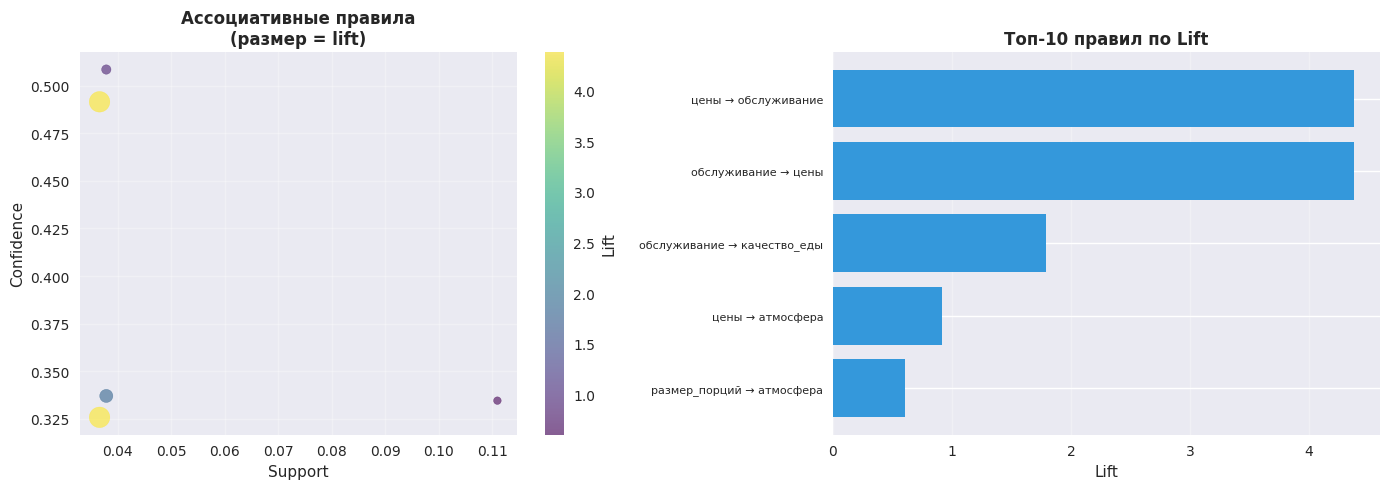


📊 Топ ассоциативные правила:

1. цены → обслуживание
   Support: 0.037, Confidence: 0.492, Lift: 4.380

2. обслуживание → цены
   Support: 0.037, Confidence: 0.326, Lift: 4.380

3. обслуживание → качество_еды
   Support: 0.038, Confidence: 0.337, Lift: 1.794

4. цены → атмосфера
   Support: 0.038, Confidence: 0.508, Lift: 0.916

5. размер_порций → атмосфера
   Support: 0.111, Confidence: 0.335, Lift: 0.603


In [58]:
# Ассоциативные правила: какие проблемы часто встречаются вместе
try:
    from mlxtend.frequent_patterns import apriori, association_rules
    from mlxtend.preprocessing import TransactionEncoder
    mlxtend_available = True
except ImportError:
    print("⚠️ Для ассоциативных правил требуется mlxtend. Установите: pip install mlxtend")
    print("📝 Раздел ассоциативных правил пропущен.")
    mlxtend_available = False

if mlxtend_available:
    # Подготовка данных: создаем транзакции (каждый отзыв = транзакция с проблемами)
    transactions = []
    for categories in df['problem_categories']:
        transaction = []
        try:
            if categories is None:
                transactions.append([])
                continue
            
            if isinstance(categories, (list, tuple)):
                transaction = [c for c in categories if c]
            elif isinstance(categories, str):
                transaction = [c.strip() for c in categories.split(',') if c.strip()]
            elif hasattr(categories, 'tolist'):
                transaction = [c for c in categories.tolist() if c]
            else:
                transaction = [c for c in list(categories) if c]
        except Exception:
            transaction = []
        
        transactions.append(transaction)
    
    # Фильтруем только транзакции с проблемами
    transactions_filtered = [t for t in transactions if len(t) > 0]
    
    if len(transactions_filtered) > 0:
        # Преобразуем в бинарную матрицу
        te = TransactionEncoder()
        te_ary = te.fit(transactions_filtered).transform(transactions_filtered)
        df_transactions = pd.DataFrame(te_ary, columns=te.columns_)
        
        # Находим частые наборы (минимальная поддержка 2%)
        frequent_itemsets = apriori(df_transactions, min_support=0.02, use_colnames=True)
        
        if len(frequent_itemsets) > 0:
            # Генерируем ассоциативные правила
            rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
            
            if len(rules) > 0:
                # Визуализация
                fig, axes = plt.subplots(1, 2, figsize=(14, 5))
                
                # Support vs Confidence
                axes[0].scatter(rules['support'], rules['confidence'], 
                               s=rules['lift']*50, alpha=0.6, c=rules['lift'], cmap='viridis')
                axes[0].set_xlabel('Support')
                axes[0].set_ylabel('Confidence')
                axes[0].set_title('Ассоциативные правила\n(размер = lift)', fontweight='bold')
                axes[0].grid(True, alpha=0.3)
                plt.colorbar(axes[0].collections[0], ax=axes[0], label='Lift')
                
                # Топ правил по lift
                top_rules = rules.nlargest(10, 'lift')
                y_pos = np.arange(len(top_rules))
                axes[1].barh(y_pos, top_rules['lift'], color='#3498db')
                axes[1].set_yticks(y_pos)
                axes[1].set_yticklabels([f"{', '.join(list(rule['antecedents']))} → {', '.join(list(rule['consequents']))}" 
                                         for _, rule in top_rules.iterrows()], fontsize=8)
                axes[1].set_xlabel('Lift')
                axes[1].set_title('Топ-10 правил по Lift', fontweight='bold')
                axes[1].invert_yaxis()
                axes[1].grid(True, alpha=0.3, axis='x')
                
                plt.tight_layout()
                plt.show()
                
                # Вывод правил
                print("\n📊 Топ ассоциативные правила:")
                print("=" * 80)
                top_rules_display = rules.nlargest(10, 'lift')[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
                for idx, (_, rule) in enumerate(top_rules_display.iterrows(), 1):
                    antecedents = ', '.join(list(rule['antecedents']))
                    consequents = ', '.join(list(rule['consequents']))
                    print(f"\n{idx}. {antecedents} → {consequents}")
                    print(f"   Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}")
            else:
                print("⚠️ Не найдено ассоциативных правил с заданными параметрами")
        else:
            print("⚠️ Не найдено частых наборов проблем")
    else:
        print("⚠️ Нет транзакций с проблемами для анализа")


## 📈 11. Прогнозирование на будущее (Временные ряды)


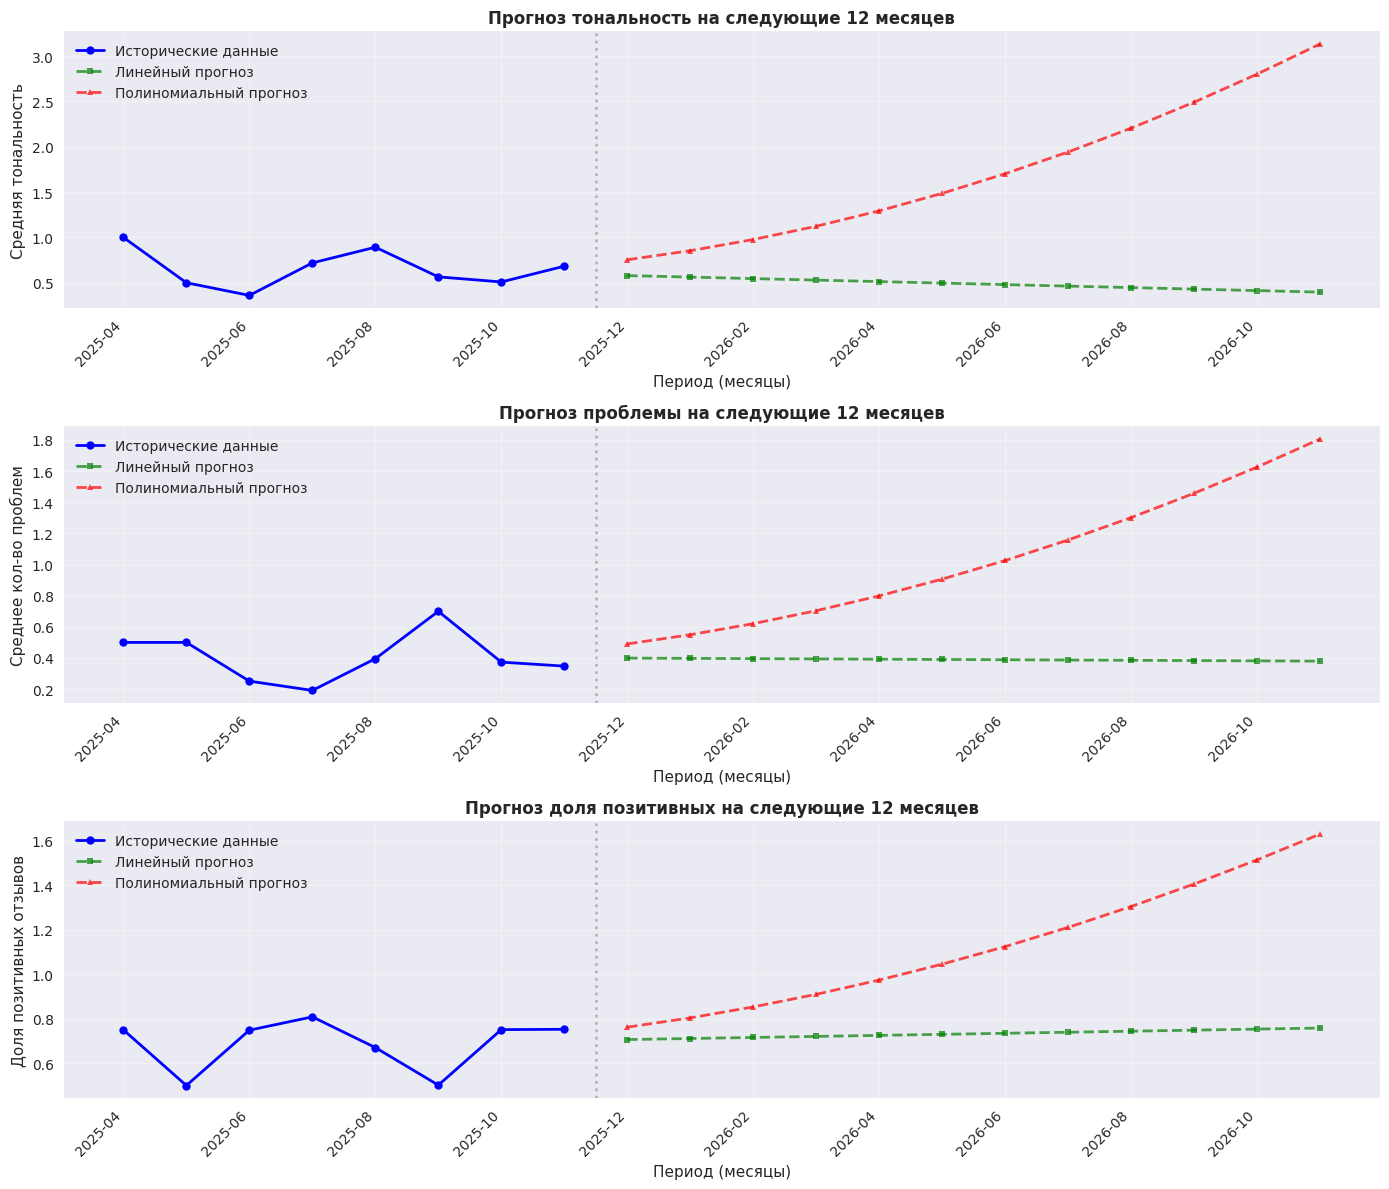


📈 ПРОГНОЗ НА СЛЕДУЮЩИЙ ГОД (12 МЕСЯЦЕВ)

💡 ЧТО ЭТО ЗНАЧИТ:
   Прогноз основан на анализе исторических данных за последние месяцы.
   Мы используем математические модели для предсказания будущих трендов.
   Чем больше данных в истории, тем точнее прогноз.

📊 ТЕКУЩАЯ СИТУАЦИЯ:
   • Тональность отзывов: позитивная (0.662)
   • Позитивных отзывов: 79.8%
   • Среднее количество проблем на отзыв: 0.36
   • Отзывов с проблемами: 793 из 2772 (28.6%)

🔮 ПРОГНОЗ НА СЛЕДУЮЩИЙ ГОД:
   • Тональность отзывов: позитивная (0.488)
     → ухудшится на 0.19 балла
   • Позитивных отзывов: 73.2%
     → уменьшится на 6.5 процентных пункта
   • Среднее количество проблем на отзыв: 0.39
     → практически не изменится

📝 ИНТЕРПРЕТАЦИЯ:
   ❌ Ожидается ухудшение тональности отзывов.
      Необходимо срочно принять меры для улучшения качества сервиса!
   ⚠️  Количество проблем останется примерно на том же уровне.

💡 РЕКОМЕНДАЦИИ:
   • Проанализируйте основные проблемы, упоминаемые в отзывах
   • Улучшите качест

In [59]:
# Прогнозирование трендов на следующий год
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

# Подготовка временных данных
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.dropna(subset=['date'])
    
    # Группировка по месяцам
    df['year_month'] = df['date'].dt.to_period('M')
    monthly_stats = df.groupby('year_month').agg({
        'sentiment_score': 'mean',
        'problems_count': 'mean',
        'has_problems': 'mean'
    }).reset_index()
    
    monthly_stats['month_index'] = range(len(monthly_stats))
    
    # Прогнозирование на 12 месяцев вперед
    future_months = 12
    X = monthly_stats[['month_index']].values
    y_sentiment = monthly_stats['sentiment_score'].values
    y_problems = monthly_stats['problems_count'].values
    y_positive = monthly_stats['has_problems'].values
    
    # Линейная и полиномиальная регрессии
    predictions = {}
    
    for metric_name, y_data in [('Тональность', y_sentiment), 
                                 ('Проблемы', y_problems),
                                 ('Доля позитивных', 1 - y_positive)]:
        # Линейная регрессия
        lr_linear = LinearRegression()
        lr_linear.fit(X, y_data)
        
        # Полиномиальная регрессия (степень 2)
        poly = PolynomialFeatures(degree=2)
        X_poly = poly.fit_transform(X)
        lr_poly = LinearRegression()
        lr_poly.fit(X_poly, y_data)
        
        # Прогнозы
        future_indices = np.array(range(len(monthly_stats), len(monthly_stats) + future_months)).reshape(-1, 1)
        future_poly = poly.transform(future_indices)
        
        linear_pred = lr_linear.predict(future_indices)
        poly_pred = lr_poly.predict(future_poly)
        
        predictions[metric_name] = {
            'linear': linear_pred,
            'polynomial': poly_pred,
            'actual': y_data
        }
    
    # Визуализация
    fig, axes = plt.subplots(3, 1, figsize=(14, 12))
    
    # Даты для отображения
    last_date = monthly_stats['year_month'].iloc[-1]
    future_dates = [str(last_date + i) for i in range(1, future_months + 1)]
    all_dates = list(monthly_stats['year_month'].astype(str)) + future_dates
    all_indices = range(len(all_dates))
    
    metrics_to_plot = [
        ('Тональность', 'Средняя тональность', axes[0]),
        ('Проблемы', 'Среднее кол-во проблем', axes[1]),
        ('Доля позитивных', 'Доля позитивных отзывов', axes[2])
    ]
    
    for metric_name, ylabel, ax in metrics_to_plot:
        pred_data = predictions[metric_name]
        
        # Исторические данные
        historical_indices = range(len(monthly_stats))
        ax.plot(historical_indices, pred_data['actual'], 'o-', 
               label='Исторические данные', linewidth=2, markersize=6, color='blue')
        
        # Линейный прогноз
        future_indices_plot = range(len(monthly_stats), len(all_dates))
        ax.plot(future_indices_plot, pred_data['linear'], 's--', 
               label='Линейный прогноз', linewidth=2, markersize=5, color='green', alpha=0.7)
        
        # Полиномиальный прогноз
        ax.plot(future_indices_plot, pred_data['polynomial'], '^--', 
               label='Полиномиальный прогноз', linewidth=2, markersize=5, color='red', alpha=0.7)
        
        # Вертикальная линия разделения
        ax.axvline(len(monthly_stats) - 0.5, color='gray', linestyle=':', linewidth=2, alpha=0.5)
        
        ax.set_xlabel('Период (месяцы)')
        ax.set_ylabel(ylabel)
        ax.set_title(f'Прогноз {metric_name.lower()} на следующие 12 месяцев', fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Подписи на оси X
        step = max(1, len(all_dates) // 10)
        ax.set_xticks(all_indices[::step])
        ax.set_xticklabels([all_dates[i] for i in all_indices[::step]], rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    # Текущие показатели для сравнения
    current_sentiment = df['sentiment_score'].mean()
    current_problems = df['problems_count'].mean()
    current_positive_pct = (df['sentiment'] == 'positive').sum() / len(df) * 100
    last_actual_sentiment = monthly_stats['sentiment_score'].iloc[-1]
    last_actual_problems = monthly_stats['problems_count'].iloc[-1]
    
    # Прогнозы на год вперед (средние значения)
    avg_future_sentiment = predictions['Тональность']['linear'].mean()
    avg_future_problems = predictions['Проблемы']['linear'].mean()
    avg_future_positive = predictions['Доля позитивных']['linear'].mean() * 100
    
    # Изменения
    sentiment_change = avg_future_sentiment - last_actual_sentiment
    problems_change = avg_future_problems - last_actual_problems
    positive_change = avg_future_positive - current_positive_pct
    
    # Понятные описания
    def describe_sentiment(score):
        """Описание тональности простым языком"""
        if score >= 0.7:
            return "очень позитивная"
        elif score >= 0.3:
            return "позитивная"
        elif score >= -0.3:
            return "нейтральная"
        elif score >= -0.7:
            return "негативная"
        else:
            return "очень негативная"
    
    def describe_change(value, metric_name):
        """Описание изменения простым языком"""
        if abs(value) < 0.05:
            return "практически не изменится"
        elif value > 0:
            if metric_name == "тональность":
                return f"улучшится на {abs(value):.2f} балла"
            else:
                return f"увеличится на {abs(value):.2f}"
        else:
            if metric_name == "тональность":
                return f"ухудшится на {abs(value):.2f} балла"
            else:
                return f"уменьшится на {abs(value):.2f}"
    
    # Вывод понятного прогноза
    print("\n" + "=" * 80)
    print("📈 ПРОГНОЗ НА СЛЕДУЮЩИЙ ГОД (12 МЕСЯЦЕВ)")
    print("=" * 80)
    
    print("\n💡 ЧТО ЭТО ЗНАЧИТ:")
    print("   Прогноз основан на анализе исторических данных за последние месяцы.")
    print("   Мы используем математические модели для предсказания будущих трендов.")
    print("   Чем больше данных в истории, тем точнее прогноз.")
    
    print("\n📊 ТЕКУЩАЯ СИТУАЦИЯ:")
    print(f"   • Тональность отзывов: {describe_sentiment(current_sentiment)} ({current_sentiment:.3f})")
    print(f"   • Позитивных отзывов: {current_positive_pct:.1f}%")
    print(f"   • Среднее количество проблем на отзыв: {current_problems:.2f}")
    print(f"   • Отзывов с проблемами: {df['has_problems'].sum()} из {len(df)} ({df['has_problems'].sum()/len(df)*100:.1f}%)")
    
    print("\n🔮 ПРОГНОЗ НА СЛЕДУЮЩИЙ ГОД:")
    print(f"   • Тональность отзывов: {describe_sentiment(avg_future_sentiment)} ({avg_future_sentiment:.3f})")
    print(f"     → {describe_change(sentiment_change, 'тональность')}")
    
    print(f"   • Позитивных отзывов: {avg_future_positive:.1f}%")
    if positive_change > 0:
        print(f"     → увеличится на {positive_change:.1f} процентных пункта")
    elif positive_change < 0:
        print(f"     → уменьшится на {abs(positive_change):.1f} процентных пункта")
    else:
        print(f"     → останется примерно на том же уровне")
    
    print(f"   • Среднее количество проблем на отзыв: {avg_future_problems:.2f}")
    print(f"     → {describe_change(-problems_change, 'проблемы')}")
    
    # Интерпретация изменений
    print("\n📝 ИНТЕРПРЕТАЦИЯ:")
    if sentiment_change > 0.1:
        print("   ✅ Ожидается значительное улучшение тональности отзывов!")
        print("      Это означает, что клиенты будут более довольны вашим сервисом.")
    elif sentiment_change > 0:
        print("   ✅ Ожидается небольшое улучшение тональности отзывов.")
        print("      Тренд положительный, но изменения будут постепенными.")
    elif sentiment_change > -0.1:
        print("   ⚠️  Тональность отзывов останется примерно на том же уровне.")
        print("      Рекомендуется принять меры для улучшения ситуации.")
    else:
        print("   ❌ Ожидается ухудшение тональности отзывов.")
        print("      Необходимо срочно принять меры для улучшения качества сервиса!")
    
    if problems_change < -0.1:
        print("   ✅ Количество проблем в отзывах значительно уменьшится!")
    elif problems_change < 0:
        print("   ✅ Количество проблем в отзывах немного уменьшится.")
    elif problems_change < 0.1:
        print("   ⚠️  Количество проблем останется примерно на том же уровне.")
    else:
        print("   ❌ Количество проблем в отзывах увеличится. Требуется внимание!")
    
    # Рекомендации
    print("\n💡 РЕКОМЕНДАЦИИ:")
    if sentiment_change < 0 or problems_change > 0:
        print("   • Проанализируйте основные проблемы, упоминаемые в отзывах")
        print("   • Улучшите качество обслуживания в проблемных областях")
        print("   • Уделите внимание обратной связи от клиентов")
    else:
        print("   • Продолжайте поддерживать текущий уровень качества")
        print("   • Отслеживайте динамику отзывов ежемесячно")
        print("   • Работайте над улучшением даже при положительных трендах")
    
    # Детальный прогноз по месяцам (упрощенный)
    print("\n📅 ДЕТАЛЬНЫЙ ПРОГНОЗ ПО МЕСЯЦАМ (первые 6 месяцев):")
    print("-" * 80)
    for month_idx in range(min(6, future_months)):
        month_name = future_dates[month_idx]
        month_sentiment = predictions['Тональность']['linear'][month_idx]
        month_problems = predictions['Проблемы']['linear'][month_idx]
        month_positive = predictions['Доля позитивных']['linear'][month_idx] * 100
        
        print(f"\n📅 {month_name}:")
        print(f"   • Тональность: {describe_sentiment(month_sentiment)} ({month_sentiment:.3f})")
        print(f"   • Позитивных отзывов: ~{month_positive:.1f}%")
        print(f"   • Проблем на отзыв: ~{month_problems:.2f}")
    
    if future_months > 6:
        print(f"\n   ... и еще {future_months - 6} месяцев (см. графики выше)")
    
    print("\n" + "=" * 80)
    print("💡 Примечание: Прогноз основан на математических моделях и может отличаться от реальности.")
    print("   На результаты могут влиять сезонность, маркетинговые акции и другие факторы.")
    print("=" * 80)
else:
    print("⚠️ Колонка 'date' не найдена. Невозможно выполнить прогнозирование.")


## 📋 12. Итоговая сводка расширенной аналитики


In [56]:
# Итоговая сводка по всем видам аналитики
print("=" * 80)
print("📊 ИТОГОВАЯ СВОДКА РАСШИРЕННОЙ АНАЛИТИКИ")
print("=" * 80)

print(f"\n📝 Базовые метрики:")
print(f"  • Всего отзывов: {len(df)}")
print(f"  • Отзывов с проблемами: {df['has_problems'].sum()} ({df['has_problems'].sum()/len(df)*100:.1f}%)")
print(f"  • Средняя тональность: {df['sentiment_score'].mean():.3f}")
print(f"  • Среднее количество проблем: {df['problems_count'].mean():.2f}")

# Корреляция
if 'sentiment_score' in df.columns and 'problems_count' in df.columns:
    corr = df['sentiment_score'].corr(df['problems_count'])
    print(f"\n🔗 Корреляция тональности и проблем: {corr:.3f}")

# Кластеризация
if 'cluster' in df.columns:
    n_clusters = df['cluster'].nunique()
    print(f"\n🎨 Кластеризация:")
    print(f"  • Найдено кластеров: {n_clusters}")
    for cluster_id in sorted(df['cluster'].unique()):
        cluster_size = (df['cluster'] == cluster_id).sum()
        cluster_sentiment = df[df['cluster'] == cluster_id]['sentiment_score'].mean()
        print(f"  • Кластер {cluster_id}: {cluster_size} отзывов, средняя тональность: {cluster_sentiment:.3f}")

# Классификация
if 'results' in globals() and 'Random Forest' in results:
    print(f"\n🎯 Классификация:")
    print(f"  • Точность Random Forest: {results['Random Forest']['accuracy']:.3f}")

# Прогнозирование
if 'predictions' in globals():
    print(f"\n📈 Прогнозирование:")
    if 'Тональность' in predictions:
        avg_future_sentiment = predictions['Тональность']['linear'].mean()
        current_sentiment = df['sentiment_score'].mean()
        print(f"  • Прогноз тональности на год: {avg_future_sentiment:.3f} (изменение: {avg_future_sentiment - current_sentiment:+.3f})")
    if 'Проблемы' in predictions:
        avg_future_problems = predictions['Проблемы']['linear'].mean()
        current_problems = df['problems_count'].mean()
        print(f"  • Прогноз проблем на год: {avg_future_problems:.2f} (изменение: {avg_future_problems - current_problems:+.2f})")

print("\n" + "=" * 80)
print("✅ Расширенная аналитика завершена!")
print("=" * 80)


📊 ИТОГОВАЯ СВОДКА РАСШИРЕННОЙ АНАЛИТИКИ

📝 Базовые метрики:
  • Всего отзывов: 2772
  • Отзывов с проблемами: 793 (28.6%)
  • Средняя тональность: 0.662
  • Среднее количество проблем: 0.36

🔗 Корреляция тональности и проблем: -0.247

🎨 Кластеризация:
  • Найдено кластеров: 10
  • Кластер 0: 1363 отзывов, средняя тональность: 0.991
  • Кластер 1: 89 отзывов, средняя тональность: -0.292
  • Кластер 2: 177 отзывов, средняя тональность: 0.102
  • Кластер 3: 116 отзывов, средняя тональность: 0.482
  • Кластер 4: 322 отзывов, средняя тональность: 0.940
  • Кластер 5: 264 отзывов, средняя тональность: -0.001
  • Кластер 6: 233 отзывов, средняя тональность: 0.642
  • Кластер 7: 29 отзывов, средняя тональность: -0.764
  • Кластер 8: 60 отзывов, средняя тональность: -1.000
  • Кластер 9: 119 отзывов, средняя тональность: 0.545

🎯 Классификация:
  • Точность Random Forest: 0.874

📈 Прогнозирование:
  • Прогноз тональности на год: 0.488 (изменение: -0.174)
  • Прогноз проблем на год: 0.39 (измене

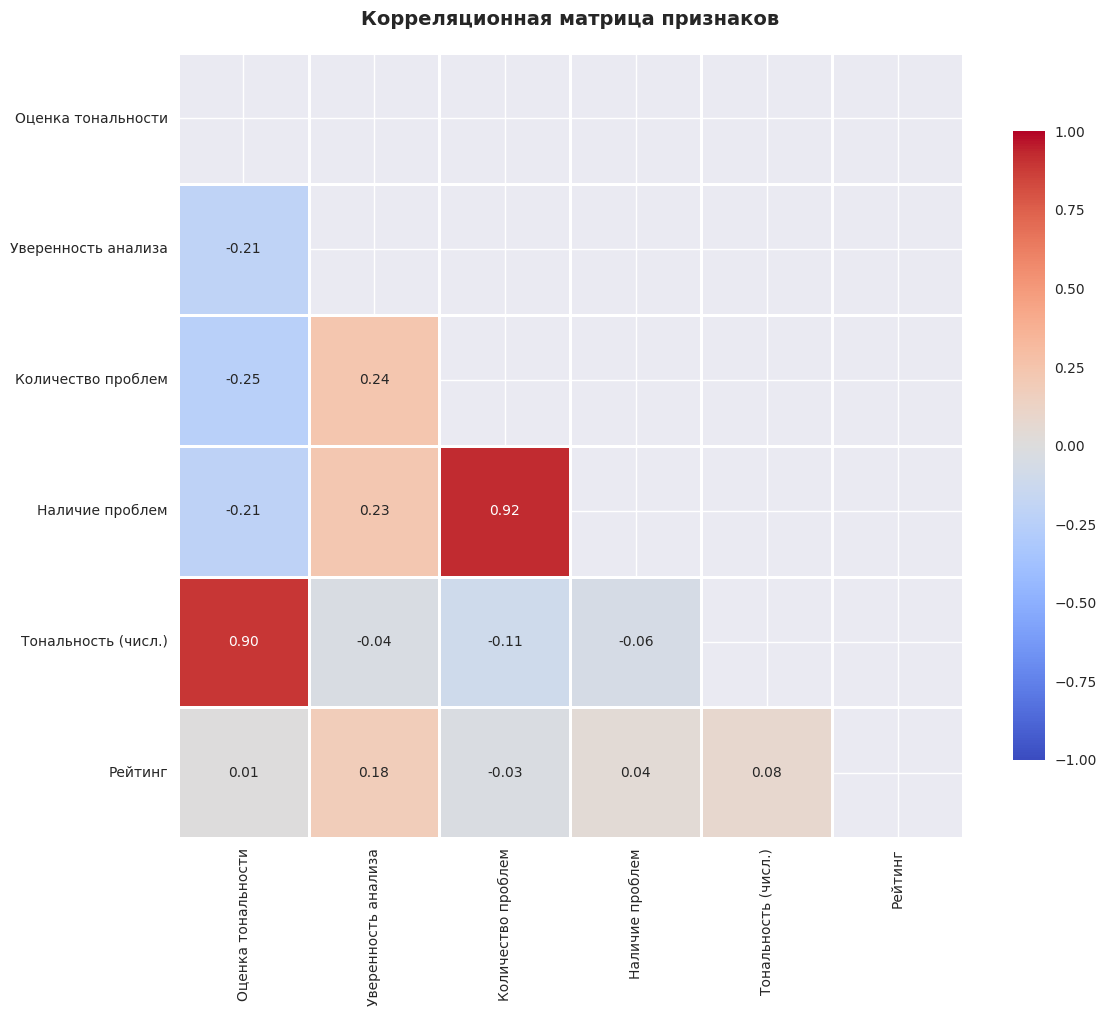


📊 Сильные корреляции (|r| > 0.3):
  Оценка тональности ↔ Тональность (числ.): 0.897
  Количество проблем ↔ Наличие проблем: 0.925


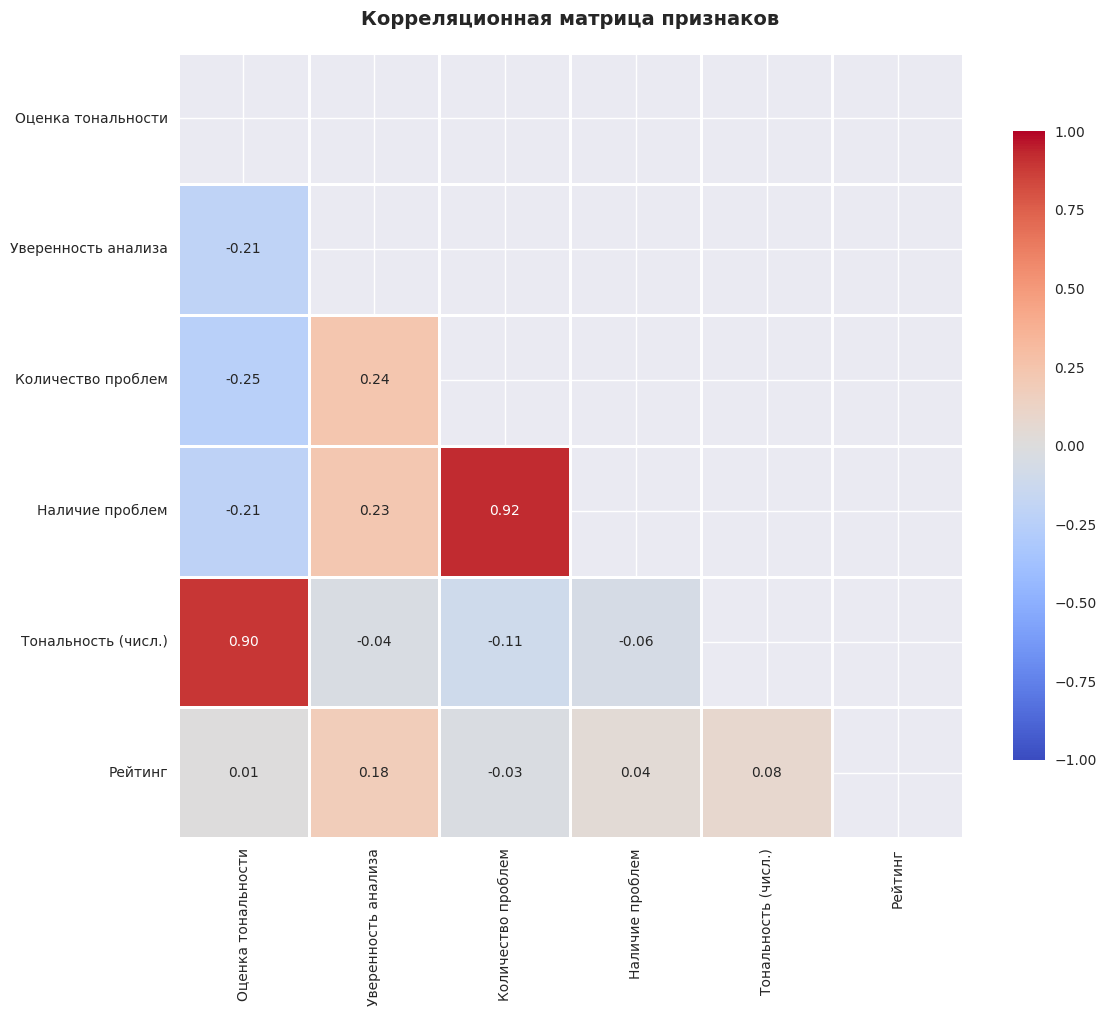


📊 Сильные корреляции (|r| > 0.3):
  Оценка тональности ↔ Тональность (числ.): 0.897
  Количество проблем ↔ Наличие проблем: 0.925


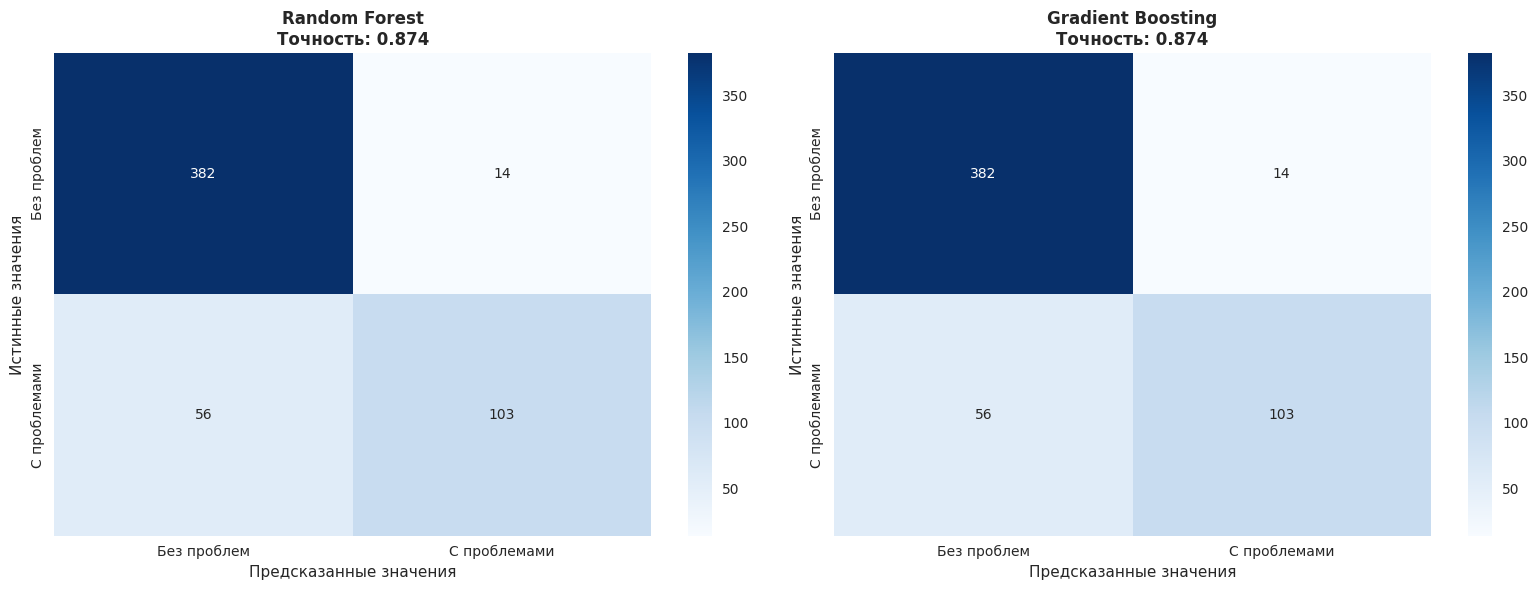


📊 Отчет по классификации (Random Forest):
              precision    recall  f1-score   support

 Без проблем       0.87      0.96      0.92       396
С проблемами       0.88      0.65      0.75       159

    accuracy                           0.87       555
   macro avg       0.88      0.81      0.83       555
weighted avg       0.87      0.87      0.87       555


📈 Важность признаков:
  sentiment_score: 0.498
  sentiment_confidence: 0.328
  rating: 0.173


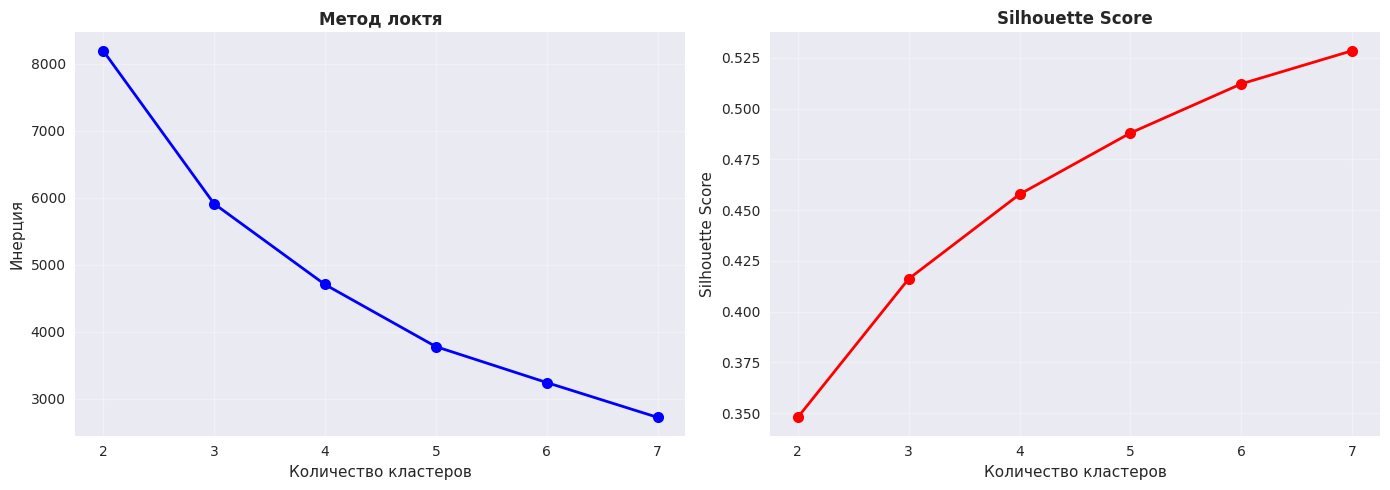


🎯 Оптимальное число кластеров: 7 (silhouette score: 0.529)


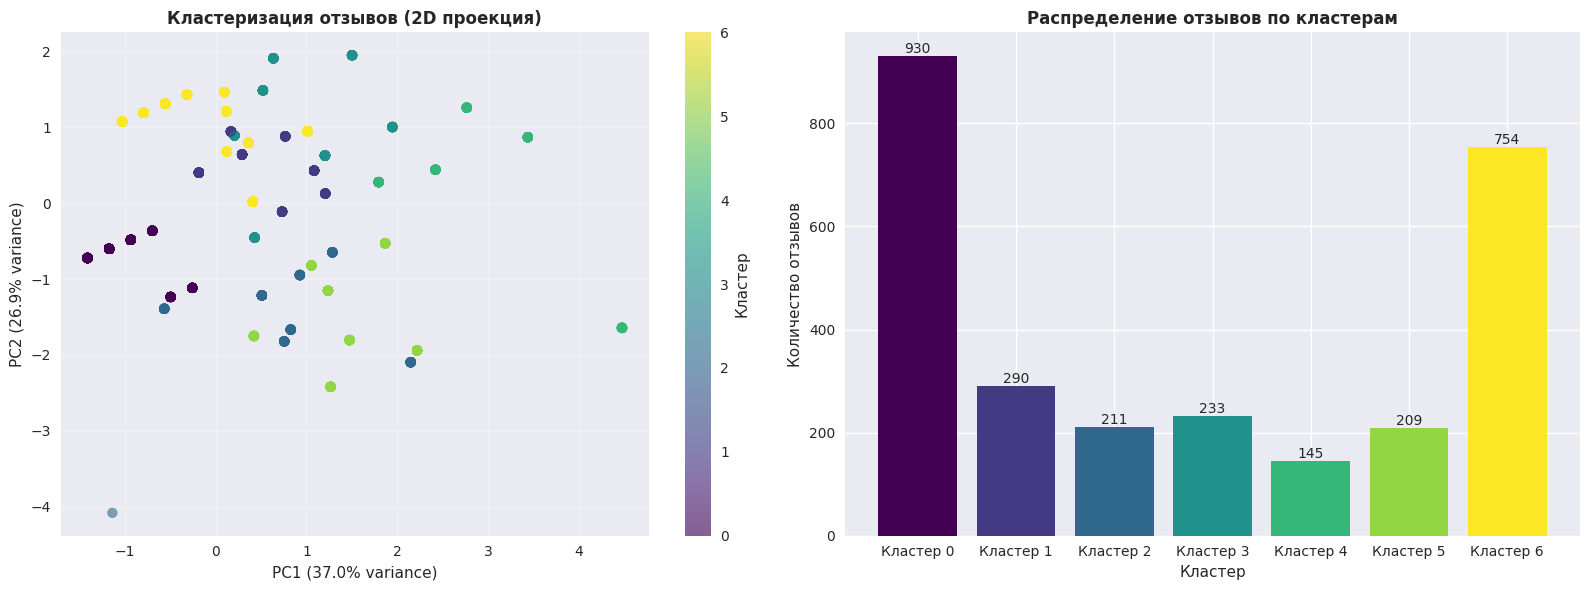


📊 Характеристики кластеров:
         Средняя тональность  Средняя уверенность  Среднее кол-во проблем  \
cluster                                                                     
0                      1.000                0.197                   0.065   
1                      0.067                0.180                   0.300   
2                     -0.396                0.299                   0.284   
3                      0.484                0.749                   0.000   
4                      0.233                0.960                   1.400   
5                      0.446                0.342                   1.713   
6                      0.966                0.292                   0.308   

         Доля с проблемами  
cluster                     
0                    0.065  
1                    0.300  
2                    0.284  
3                    0.000  
4                    1.000  
5                    1.000  
6                    0.308  


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

ModuleNotFoundError: No module named 'mlxtend'

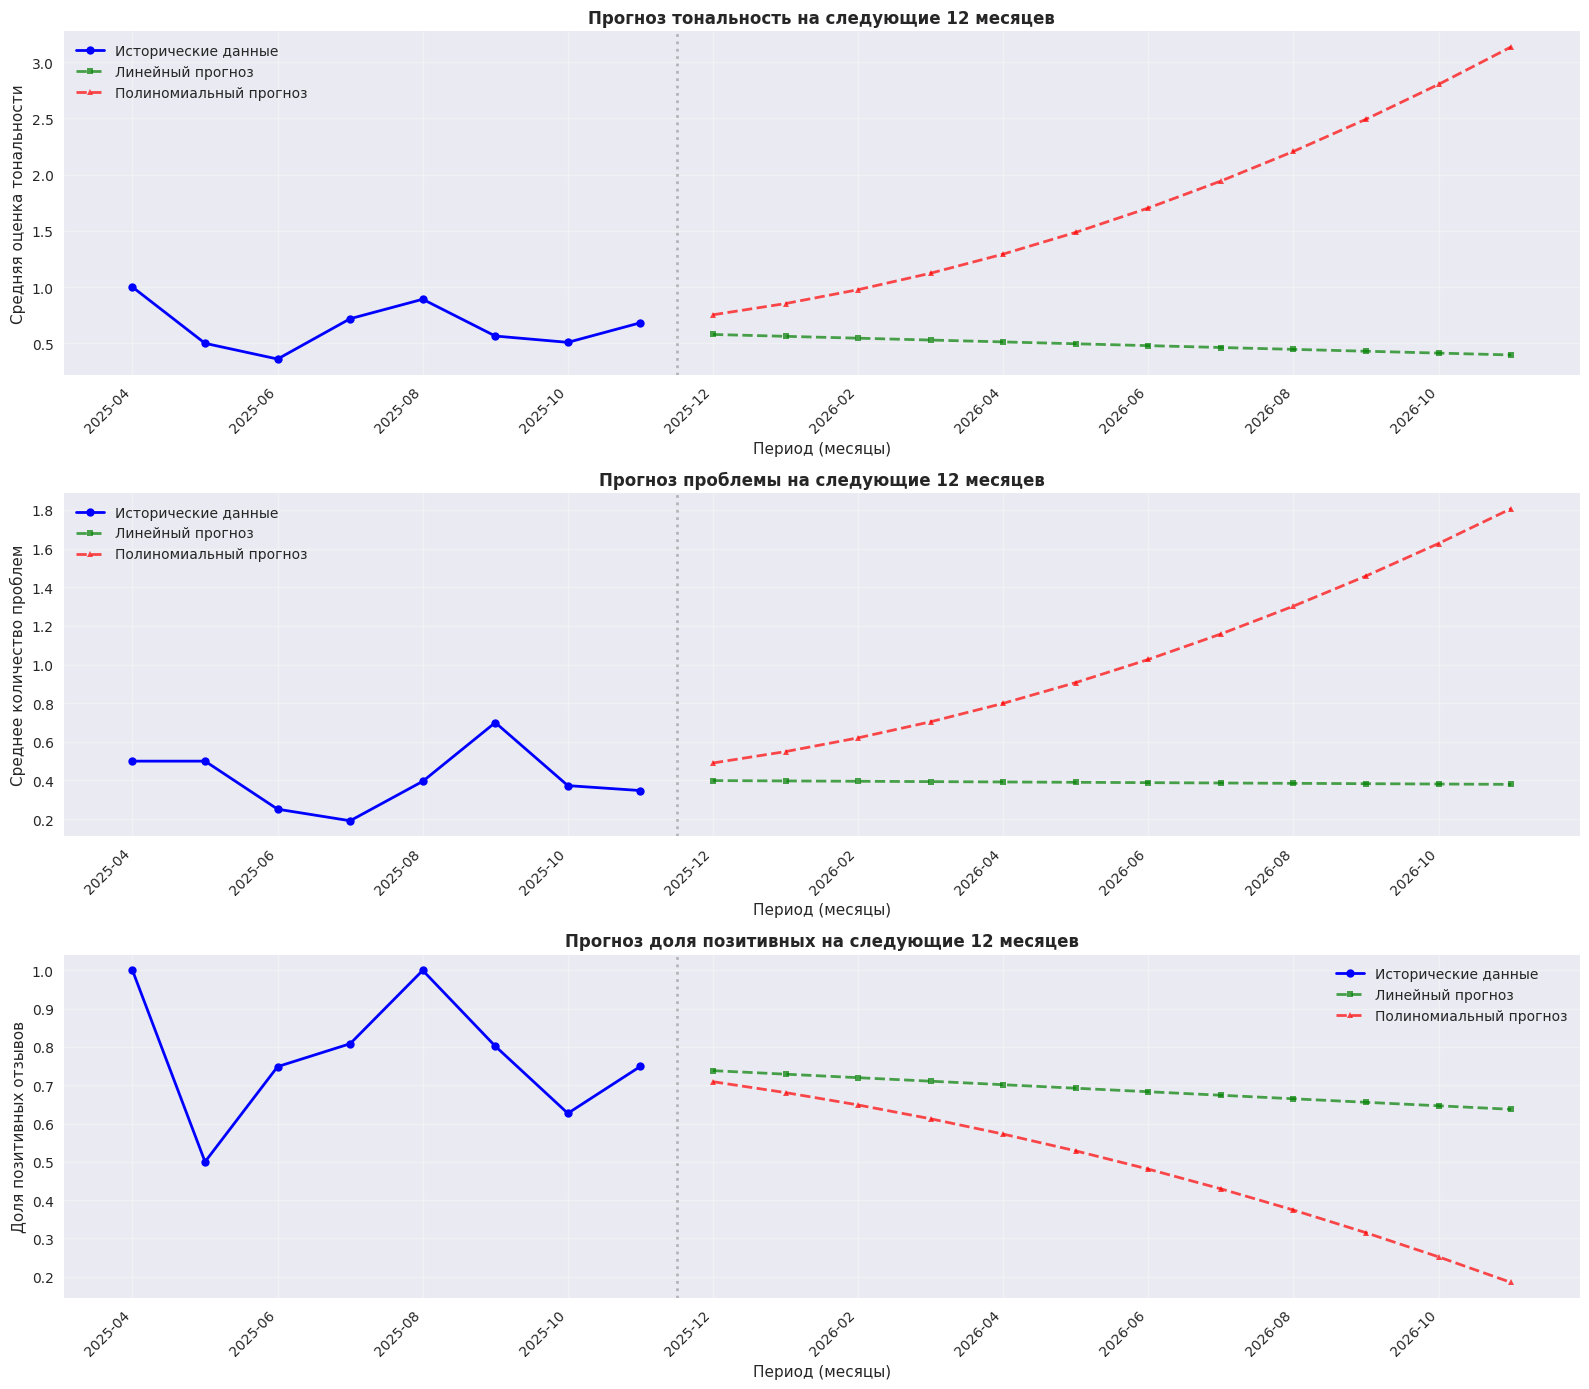


📈 Прогноз на следующие 12 месяцев:

📅 2025-12:
  • Тональность (линейный): 0.579
  • Тональность (полиномиальный): 0.754
  • Проблемы (линейный): 0.40
  • Проблемы (полиномиальный): 0.49
  • Доля позитивных (линейный): 73.8%
  • Доля позитивных (полиномиальный): 70.9%

📅 2026-01:
  • Тональность (линейный): 0.562
  • Тональность (полиномиальный): 0.854
  • Проблемы (линейный): 0.40
  • Проблемы (полиномиальный): 0.55
  • Доля позитивных (линейный): 72.9%
  • Доля позитивных (полиномиальный): 68.1%

📅 2026-02:
  • Тональность (линейный): 0.546
  • Тональность (полиномиальный): 0.977
  • Проблемы (линейный): 0.40
  • Проблемы (полиномиальный): 0.62
  • Доля позитивных (линейный): 72.0%
  • Доля позитивных (полиномиальный): 64.8%

📅 2026-03:
  • Тональность (линейный): 0.529
  • Тональность (полиномиальный): 1.123
  • Проблемы (линейный): 0.39
  • Проблемы (полиномиальный): 0.70
  • Доля позитивных (линейный): 71.1%
  • Доля позитивных (полиномиальный): 61.2%

📅 2026-04:
  • Тональность 

📊 ИТОГОВАЯ СВОДКА РАСШИРЕННОЙ АНАЛИТИКИ

📝 Базовые метрики:
  • Всего отзывов: 2772
  • Отзывов с проблемами: 793 (28.6%)
  • Средняя тональность: 0.662
  • Среднее количество проблем: 0.36

🔗 Корреляция тональности и проблем: -0.247

🎨 Кластеризация:
  • Найдено кластеров: 7
  • Кластер 0: 930 отзывов, средняя тональность: 1.000
  • Кластер 1: 290 отзывов, средняя тональность: 0.067
  • Кластер 2: 211 отзывов, средняя тональность: -0.396
  • Кластер 3: 233 отзывов, средняя тональность: 0.484
  • Кластер 4: 145 отзывов, средняя тональность: 0.233
  • Кластер 5: 209 отзывов, средняя тональность: 0.446
  • Кластер 6: 754 отзывов, средняя тональность: 0.966

🎯 Классификация:
  • Точность Random Forest: 0.874

📈 Прогнозирование:
  • Прогноз тональности на год: 0.488 (изменение: -0.195)
  • Прогноз проблем на год: 0.39 (изменение: +0.04)

✅ Расширенная аналитика завершена!


In [25]:
# Проверяем наличие необходимых переменных и импортов
if 'pd' not in globals():
    import pandas as pd

if 'df' not in globals():
    print("⚠️ Переменная df не определена. Загружаем данные...")
    import os
    import sys
    
    # Добавляем корневую папку проекта в путь
    project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
    if project_root not in sys.path:
        sys.path.insert(0, project_root)
    
    # Загружаем исходные данные
    df = pd.read_csv('../data/all_reviews.csv', encoding='utf-8-sig')
    
    # Запускаем NLP анализ
    print("⏳ Запускаем NLP анализ отзывов...")
    from nlp.review_analyzer import ReviewAnalyzer
    
    analyzer = ReviewAnalyzer()
    rating_col = 'rating' if 'rating' in df.columns else None
    df_analyzed = analyzer.analyze_dataframe(df, text_column='text', rating_column=rating_col)
    
    # Удаляем дублирующиеся колонки из df_analyzed (оставляем только результаты анализа)
    if 'text' in df_analyzed.columns:
        df_analyzed = df_analyzed.drop(columns=['text'])
    if 'rating' in df_analyzed.columns:
        df_analyzed = df_analyzed.drop(columns=['rating'])
    
    # Объединяем результаты
    df = df.reset_index()
    df = df.merge(df_analyzed, left_on='index', right_on='original_index', how='left')
    df = df.drop(columns=['index', 'original_index'])
    print("✅ Данные загружены и проанализированы!")

# Проверяем наличие необходимых колонок с детальной информацией
required_columns = ['has_problems', 'problems_count', 'sentiment', 'problem_categories']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"⚠️ Отсутствуют колонки: {', '.join(missing_columns)}")
    print(f"📋 Доступные колонки: {', '.join(df.columns)}")
    print("⚠️ Убедитесь, что ячейка 2 была выполнена успешно.")
    raise KeyError(f"Необходимые колонки отсутствуют: {', '.join(missing_columns)}. Выполните ячейку 2 для загрузки и анализа данных.")

# Дополнительная проверка после merge
if 'has_problems' not in df.columns:
    print("❌ Критическая ошибка: колонка 'has_problems' не найдена после анализа!")
    print(f"📋 Доступные колонки после merge: {', '.join(df.columns)}")
    raise KeyError("Колонка 'has_problems' не была создана при анализе.")

# Проверяем и вычисляем sentiment_counts_ru, если не определена
if 'sentiment_counts_ru' not in globals():
    sentiment_counts = df['sentiment'].value_counts()
    sentiment_labels = {
        'positive': 'Позитивные',
        'negative': 'Негативные',
        'neutral': 'Нейтральные'
    }
    sentiment_counts_ru = pd.Series({
        sentiment_labels.get(k, k): v 
        for k, v in sentiment_counts.items()
    })

# Проверяем и вычисляем category_counts_ru, если не определена
if 'category_counts_ru' not in globals():
    from collections import Counter
    all_categories = []
    for categories in df['problem_categories']:
        # Безопасная проверка наличия данных (избегаем проблемы с массивами)
        try:
            # Сначала проверяем тип данных
            if categories is None:
                continue
            
            # Для списков и кортежей
            if isinstance(categories, (list, tuple)):
                if len(categories) > 0:
                    all_categories.extend([c for c in categories if c])
                continue
            
            # Для строк
            if isinstance(categories, str):
                if len(categories.strip()) > 0:
                    cats = [c.strip() for c in categories.split(',') if c.strip()]
                    all_categories.extend(cats)
                continue
            
            # Для других типов (включая numpy arrays) - проверяем через try/except
            try:
                # Пробуем проверить через pd.isna (работает для скалярных значений)
                if not pd.isna(categories):
                    # Если это что-то с длиной, проверяем длину
                    if hasattr(categories, '__len__'):
                        if len(categories) > 0:
                            # Пробуем преобразовать в список
                            if hasattr(categories, 'tolist'):
                                all_categories.extend([c for c in categories.tolist() if c])
                            else:
                                all_categories.extend([c for c in list(categories) if c])
            except (ValueError, TypeError):
                # Если не получается проверить, пропускаем
                continue
        except Exception:
            # Пропускаем любые проблемные значения
            continue
    
    category_counts = Counter(all_categories)
    category_translation = {
        'качество_еды': 'Качество еды',
        'обслуживание': 'Обслуживание',
        'чистота': 'Чистота',
        'цены': 'Цены',
        'ожидание': 'Ожидание',
        'атмосфера': 'Атмосфера',
        'технические': 'Технические',
        'размер_порций': 'Размер порций'
    }
    category_counts_ru = {category_translation.get(k, k): v for k, v in category_counts.items()}

print("=" * 60)
print("📊 ИТОГОВАЯ СВОДКА ПО АНАЛИЗУ ОТЗЫВОВ")
print("=" * 60)
print(f"\n📝 Всего отзывов: {len(df)}")
print(f"\n📈 Тональность:")
for sentiment, count in sentiment_counts_ru.items():
    percent = count / len(df) * 100
    print(f"  • {sentiment}: {count} ({percent:.1f}%)")
print(f"\n🔍 Проблемы:")
# Безопасный доступ к колонкам с проверкой
try:
    has_problems_sum = df['has_problems'].sum() if 'has_problems' in df.columns else 0
    problems_count_sum = df['problems_count'].sum() if 'problems_count' in df.columns else 0
    problems_count_mean = df['problems_count'].mean() if 'problems_count' in df.columns else 0
    
    print(f"  • Отзывов с проблемами: {has_problems_sum} ({has_problems_sum/len(df)*100:.1f}%)")
    print(f"  • Всего проблем найдено: {problems_count_sum}")
    print(f"  • Среднее проблем на отзыв: {problems_count_mean:.2f}")
except KeyError as e:
    print(f"  ❌ Ошибка доступа к колонкам: {e}")
    print(f"  📋 Доступные колонки: {', '.join(df.columns)}")
    raise
if category_counts_ru:
    print(f"\n📊 Топ-5 проблем:")
    for i, (cat, count) in enumerate(sorted(category_counts_ru.items(), key=lambda x: x[1], reverse=True)[:5], 1):
        print(f"  {i}. {cat}: {count} упоминаний")
print("\n" + "=" * 60)


📊 ИТОГОВАЯ СВОДКА ПО АНАЛИЗУ ОТЗЫВОВ

📝 Всего отзывов: 2772

📈 Тональность:
  • Позитивные: 2211 (79.8%)
  • Нейтральные: 353 (12.7%)
  • Негативные: 208 (7.5%)

🔍 Проблемы:
  • Отзывов с проблемами: 793 (28.6%)
  • Всего проблем найдено: 1000
  • Среднее проблем на отзыв: 0.36

📊 Топ-5 проблем:
  1. Атмосфера: 440 упоминаний
  2. Размер порций: 263 упоминаний
  3. Качество еды: 149 упоминаний
  4. Обслуживание: 89 упоминаний
  5. Цены: 59 упоминаний

